<a href="https://colab.research.google.com/github/UznetDev/M5-H2-Regression-Competition/blob/main/notebooks/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import plotly.express as px
import pandas as pd
import pandas_datareader as web
import datetime as dt
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import (RandomForestRegressor, BaggingRegressor,
                              ExtraTreesRegressor)
import scipy.stats as stats
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.decomposition import PCA

## Load data

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df.head(1)

id   Row#  clonesize  honeybee  bumbles  andrena  osmia  MaxOfUpperTRange  \
0   0  104.0       12.5      0.25     0.25     0.25   0.75              69.7   

   MinOfUpperTRange  AverageOfUpperTRange  MaxOfLowerTRange  MinOfLowerTRange  \
0              42.1                  58.2              50.2              24.3   

   AverageOfLowerTRange  RainingDays  AverageRainingDays  fruitset  fruitmass  \
0                  41.2         16.0                0.26  0.477941   0.423927   

       seeds       yield  
0  34.043022  6079.08526

## data info

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15000 non-null  int64  
 1   Row#                  15000 non-null  float64
 2   clonesize             15000 non-null  float64
 3   honeybee              15000 non-null  float64
 4   bumbles               15000 non-null  float64
 5   andrena               15000 non-null  float64
 6   osmia                 15000 non-null  float64
 7   MaxOfUpperTRange      15000 non-null  float64
 8   MinOfUpperTRange      15000 non-null  float64
 9   AverageOfUpperTRange  15000 non-null  float64
 10  MaxOfLowerTRange      15000 non-null  float64
 11  MinOfLowerTRange      15000 non-null  float64
 12  AverageOfLowerTRange  15000 non-null  float64
 13  RainingDays           15000 non-null  float64
 14  AverageRainingDays    15000 non-null  float64
 15  fruitset           

1. **id**: Unique identifier for each row.
2. **Row#**: Another identifier column, possibly a sequence number.
3. **clonesize**: Represents clone size, possibly relating to plant or crop metrics.
4. **honeybee**, **bumbles**, **andrena**, **osmia**: Variables related to pollinators or insects that could affect crop yield.
5. **MaxOfUpperTRange**, **MinOfUpperTRange**, **AverageOfUpperTRange**: Temperature range (upper) metrics, indicating the maximum, minimum, and average temperatures recorded in the upper range.
6. **MaxOfLowerTRange**, **MinOfLowerTRange**, **AverageOfLowerTRange**: Temperature range (lower) metrics, representing maximum, minimum, and average temperatures in the lower range.
7. **RainingDays**: Total number of days with rain.
8. **AverageRainingDays**: Average daily rainfall.
9. **fruitset**: Percentage of fruit that sets after pollination.
10. **fruitmass**: Mass of the fruit, possibly in grams.
11. **seeds**: Number of seeds per fruit.
12. **yield**: Target variable indicating the crop yield, possibly measured in kilograms or a similar unit.

In [4]:
train_df.describe()

id          Row#     clonesize      honeybee       bumbles  \
count  15000.000000  15000.000000  15000.000000  15000.000000  15000.000000   
mean    7499.500000    427.577533     19.773500      0.388500      0.284573   
std     4330.271354    214.127422      6.644451      0.390162      0.058855   
min        0.000000      0.000000     10.000000      0.000000      0.000000   
25%     3749.750000    247.000000     12.500000      0.250000      0.250000   
50%     7499.500000    469.000000     25.000000      0.500000      0.250000   
75%    11249.250000    598.000000     25.000000      0.500000      0.380000   
max    14999.000000    777.000000     40.000000     18.430000      0.585000   

            andrena         osmia  MaxOfUpperTRange  MinOfUpperTRange  \
count  15000.000000  15000.000000      15000.000000      15000.000000   
mean       0.486751      0.591612         82.245667         49.719033   
std        0.147560      0.144194          9.104125          5.519865   
min        0.000000      0.000000         69.700000         39.000000   
25%        0.380000      0.500000         77.400000         46.800000   
50%        0.500000      0.630000         86.000000         52.000000   
75%        0.630000      0.750000         86.000000         52.000000   
max        0.750000      0.750000         94.600000         57.200000   

       AverageOfUpperTRange  MaxOfLowerTRange  MinOfLowerTRange  \
count          15000.000000      15000.000000      15000.000000   
mean              68.717353         59.282947         28.686927   
std                7.606632          6.579928          3.180584   
min               56.800000         50.200000         24.300000   
25%               64.700000         55.800000         27.000000   
50%               71.900000         62.000000         30.000000   
75%               71.900000         62.000000         30.000000   
max               79.000000         68.200000         33.000000   

       AverageOfLowerTRange   RainingDays  AverageRainingDays      fruitset  \
count          15000.000000  15000.000000        15000.000000  15000.000000   
mean              48.611360     18.804700            0.327261      0.501015   
std                5.371006     11.880294            0.166934      0.077379   
min               30.000000      1.000000            0.060000      0.029066   
25%               45.800000     16.000000            0.260000      0.451083   
50%               50.800000     16.000000            0.260000      0.506225   
75%               50.800000     24.000000            0.390000      0.564795   
max               62.000000     34.000000            0.560000      0.960586   

          fruitmass         seeds         yield  
count  15000.000000  15000.000000  15000.000000  
mean       0.445967     36.115335   6022.687345  
std        0.038092      4.121393   1362.796312  
min        0.217545     22.079199   1637.704020  
25%        0.418220     33.239806   5124.854900  
50%        0.446518     36.040675   6107.382470  
75%        0.472271     39.099614   7028.673500  
max        0.645475     46.369344   8969.401840

In [5]:
train_df['yield'].describe()

count    15000.000000
mean      6022.687345
std       1362.796312
min       1637.704020
25%       5124.854900
50%       6107.382470
75%       7028.673500
max       8969.401840
Name: yield, dtype: float64

## Funfctions

In [6]:
def scatter_plot2(data: pd.DataFrame, x: str, y='yield', as_type=float):
  data = data.copy()
  corr = data[x].corr(data[y])
  data[x] = data[x].astype(as_type)
  fig = px.scatter(data, x=x, y=y,
                   title=f'Scatter Plot of {x} vs {y}',
                   trendline="ols")
  fig.add_annotation(x=data[x].max() * 0.95, y=data[y].max() * 0.95,
                     text=f'Correlation: {corr:.4f}',
                     showarrow=False)
  fig.update_traces(line=dict(color='red'), selector=dict(mode='lines'))
  fig.show()

def scatter_plot(data: pd.DataFrame, x: str, y='yield', as_type=float):
    data = data.copy()
    data[x] = data[x].astype(as_type)
    corr = data[x].corr(data[y])
    spearman_corr = data[x].corr(data[y], method='spearman')

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x=x, y=y, label=f'Pearson: {corr:.4f} \nSpearman: {spearman_corr:.4f}')


    sns.regplot(data=data, x=x, y=y, scatter=False, color='red', line_kws={"label": "OLS Trendline"})

    plt.title(f'Scatter Plot of {x} vs {y}')
    plt.legend(loc='upper right')
    plt.annotate(f'Correlation: {corr:.4f}',
                 xy=(data[x].max() * 0.95, data[y].max() * 0.95),
                 ha='center')
    plt.show()

In [7]:
def replace_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

    return df

## Visualisation and Feature engenring

In [8]:
train_df.head(1)

id   Row#  clonesize  honeybee  bumbles  andrena  osmia  MaxOfUpperTRange  \
0   0  104.0       12.5      0.25     0.25     0.25   0.75              69.7   

   MinOfUpperTRange  AverageOfUpperTRange  MaxOfLowerTRange  MinOfLowerTRange  \
0              42.1                  58.2              50.2              24.3   

   AverageOfLowerTRange  RainingDays  AverageRainingDays  fruitset  fruitmass  \
0                  41.2         16.0                0.26  0.477941   0.423927   

       seeds       yield  
0  34.043022  6079.08526

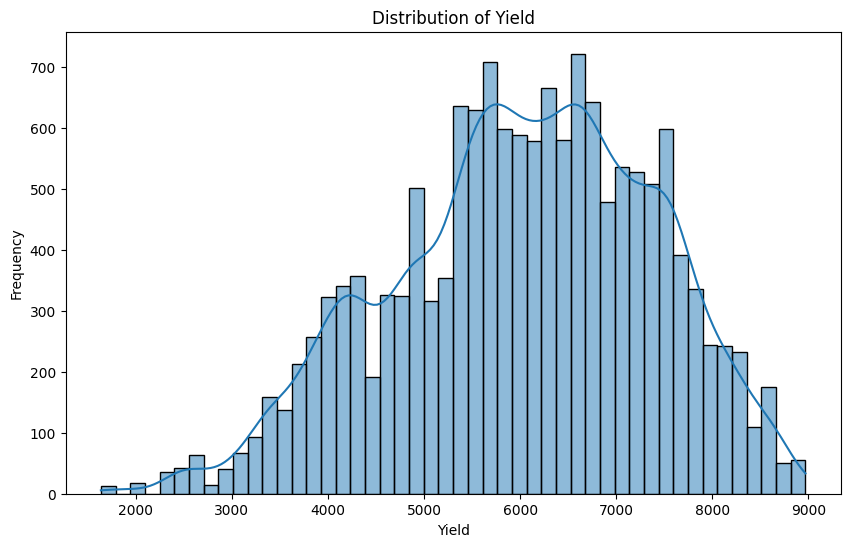

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['yield'], kde=True)
plt.title("Distribution of Yield")
plt.xlabel("Yield")
plt.ylabel("Frequency")
plt.show()

In [10]:
px.box(train_df, y='yield')

<Figure size 1200x600 with 0 Axes>

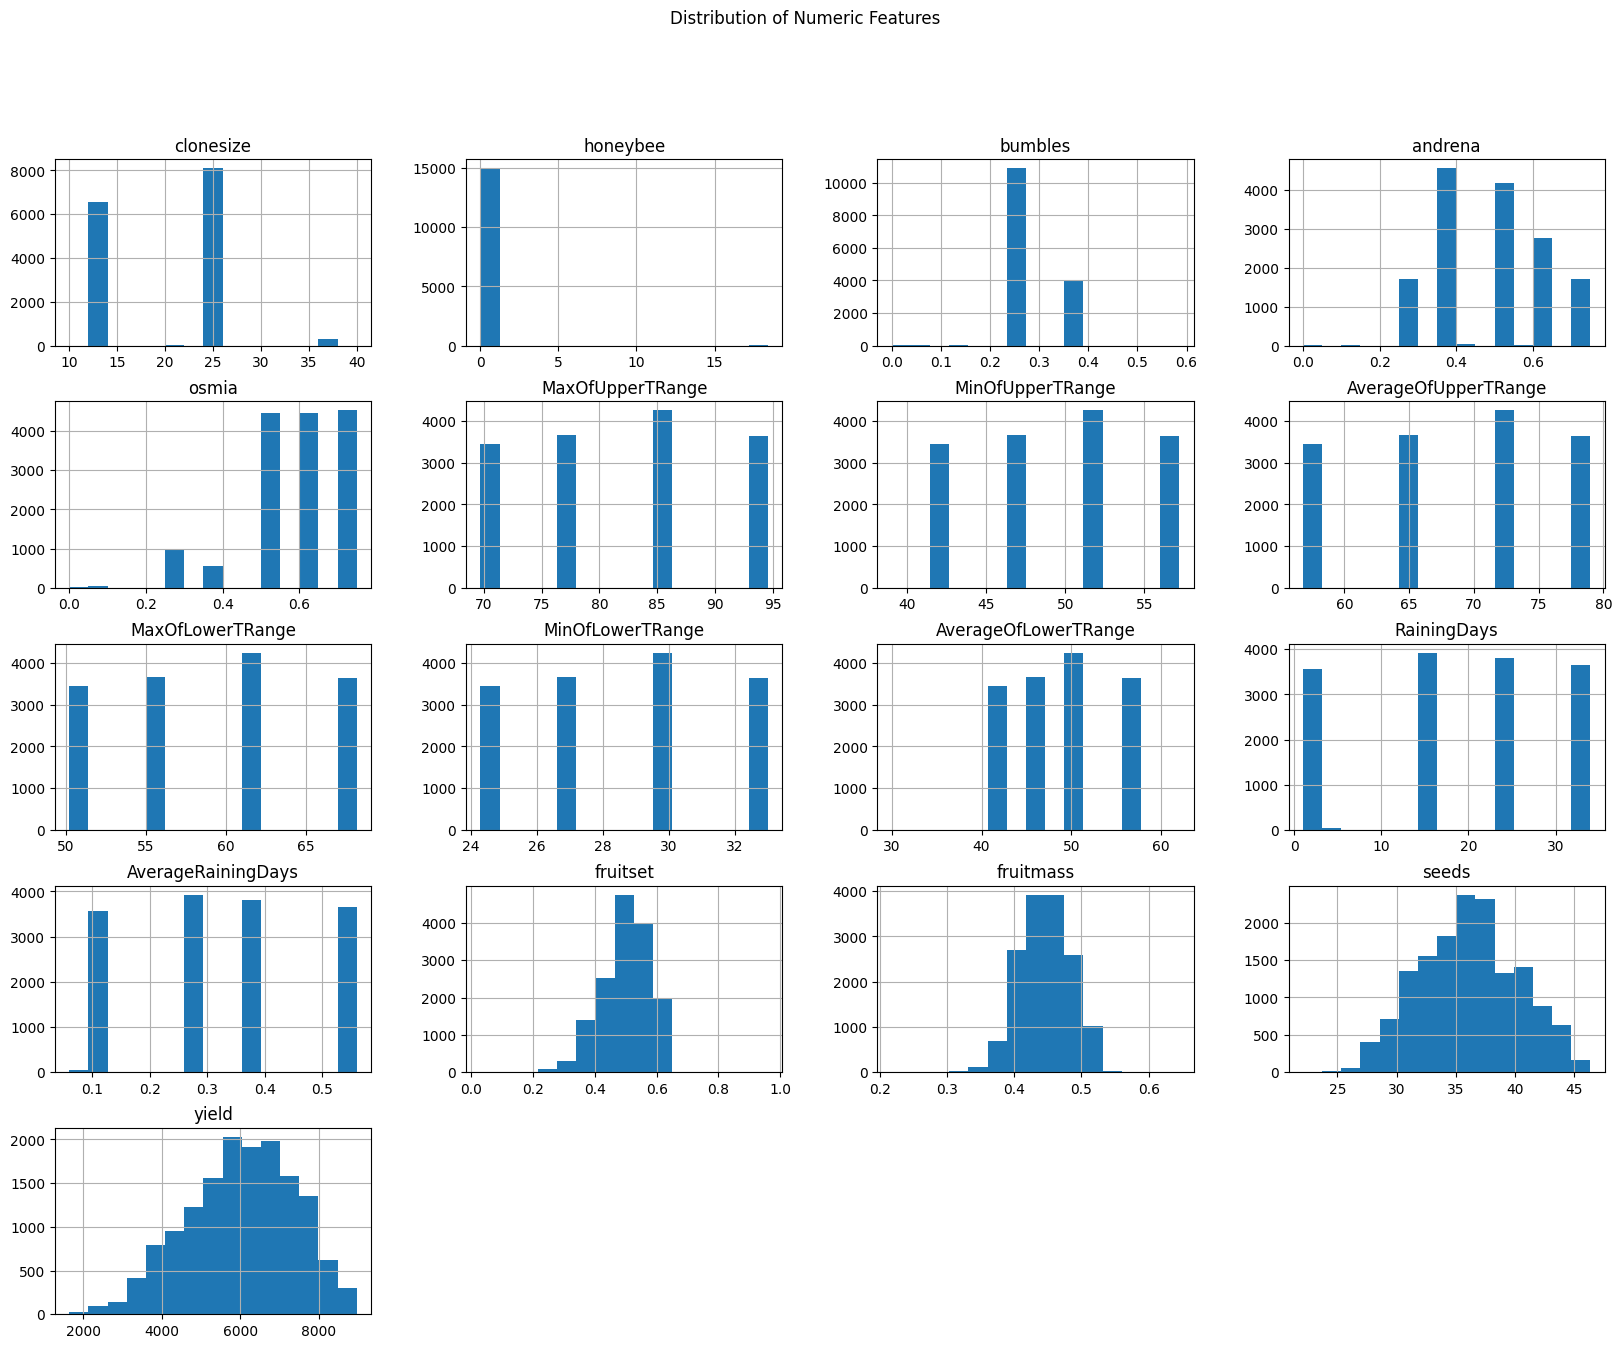

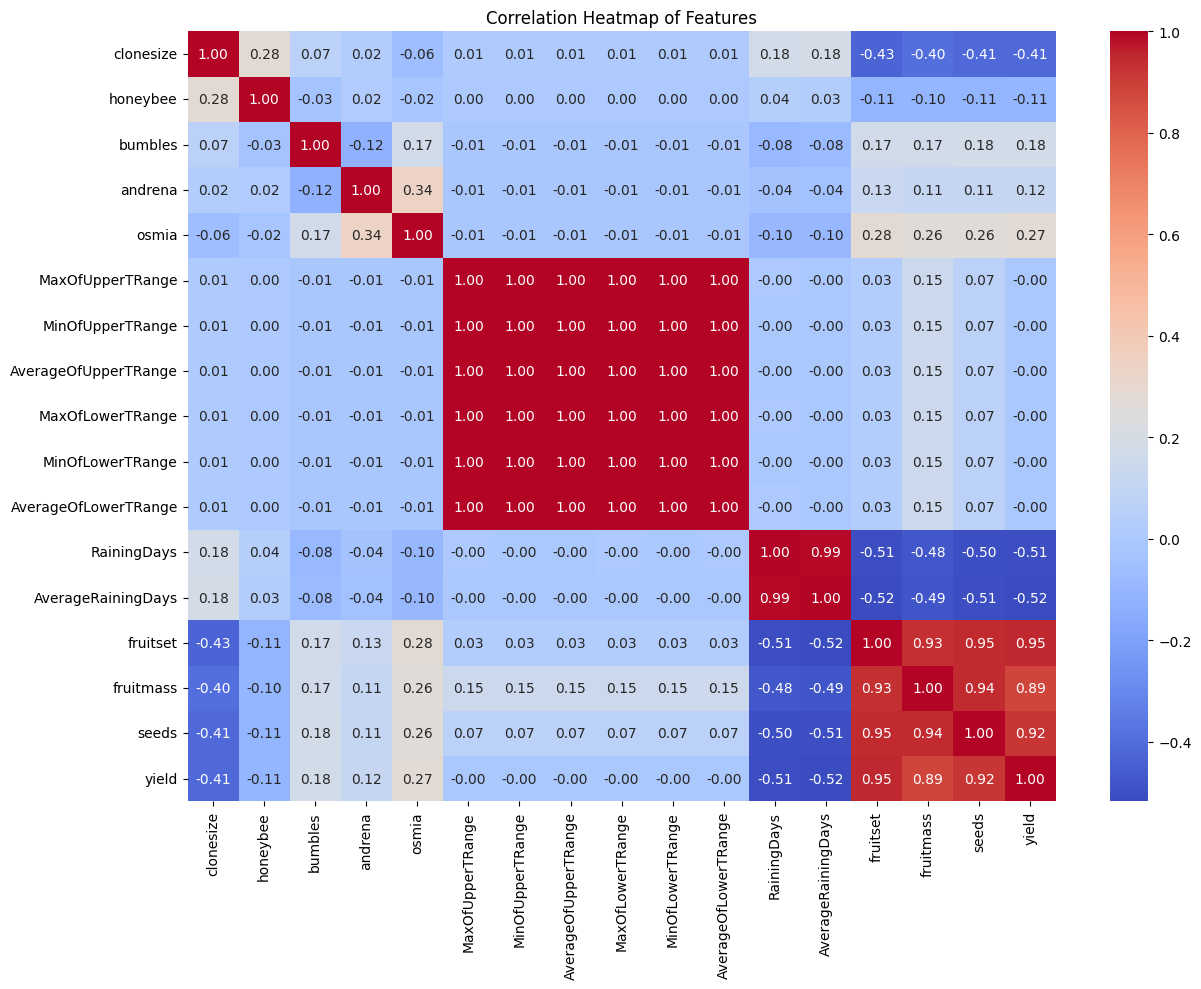

In [11]:
plt.figure(figsize=(12, 6))

train_df.drop(columns=['id', 'Row#']).hist(bins=15, figsize=(20, 15), layout=(5, 4))
plt.suptitle("Distribution of Numeric Features")
plt.show()

plt.figure(figsize=(14, 10))
sns.heatmap(train_df.drop(columns=['id', 'Row#']).corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Features")
plt.show()

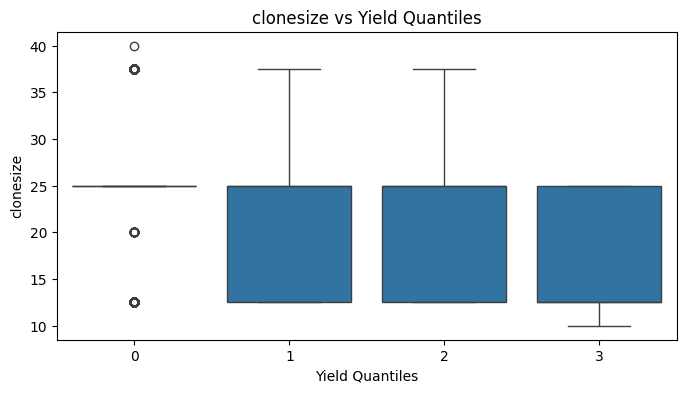

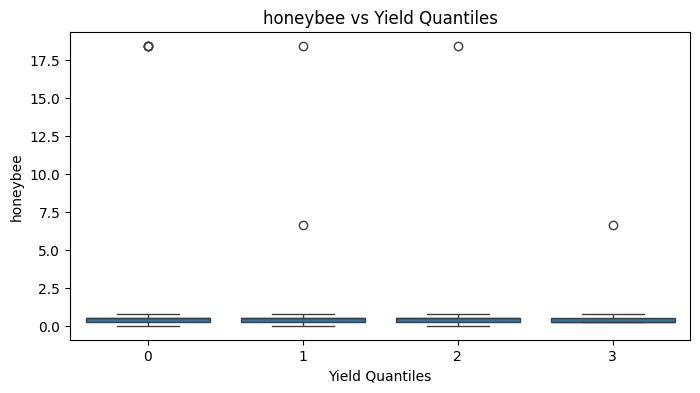

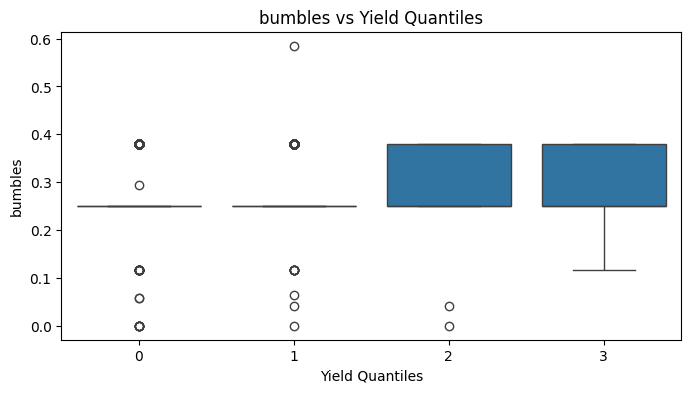

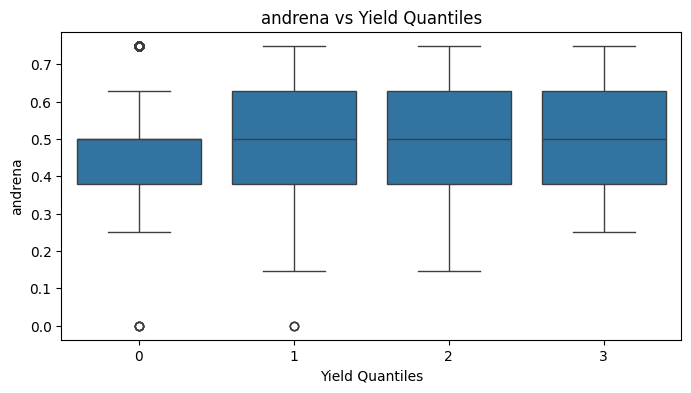

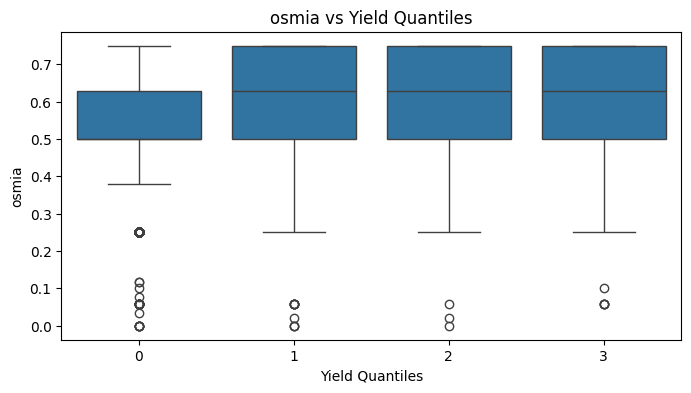

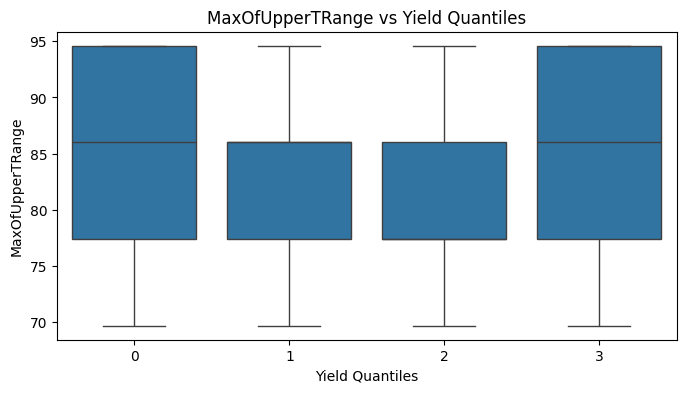

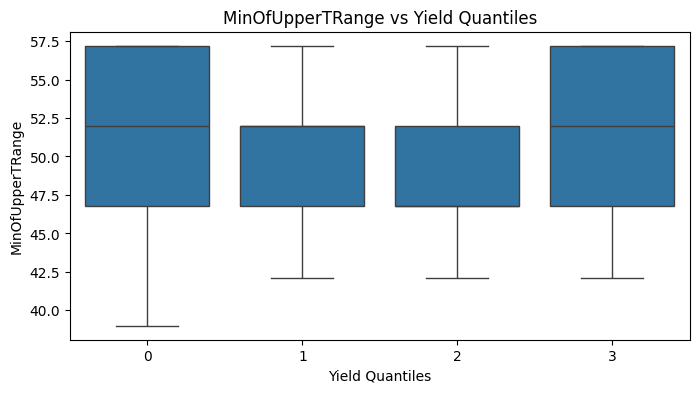

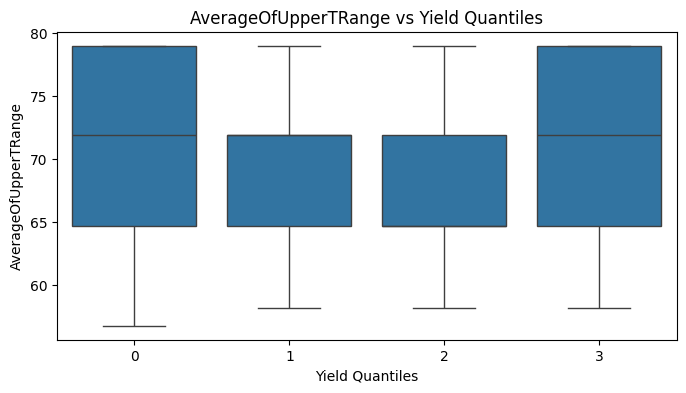

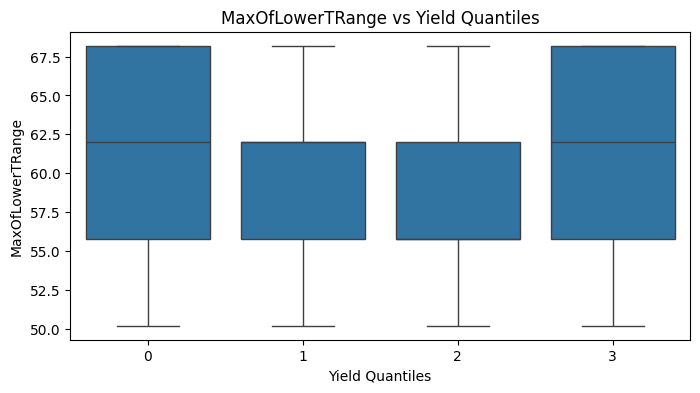

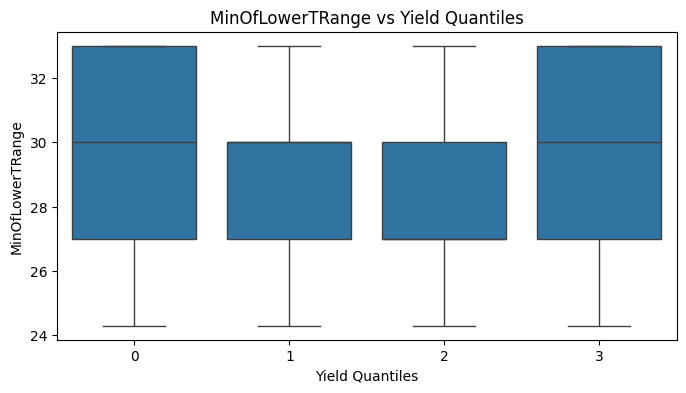

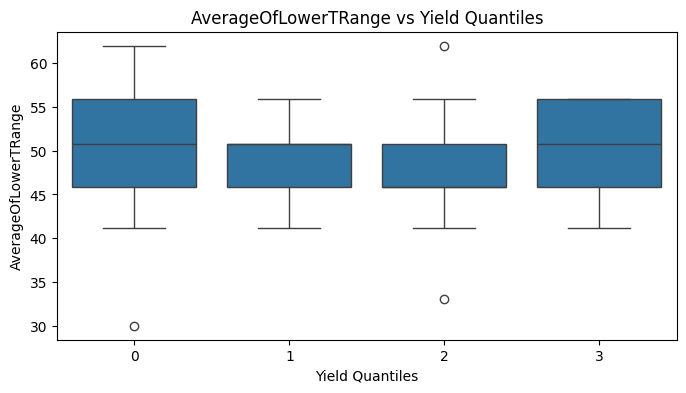

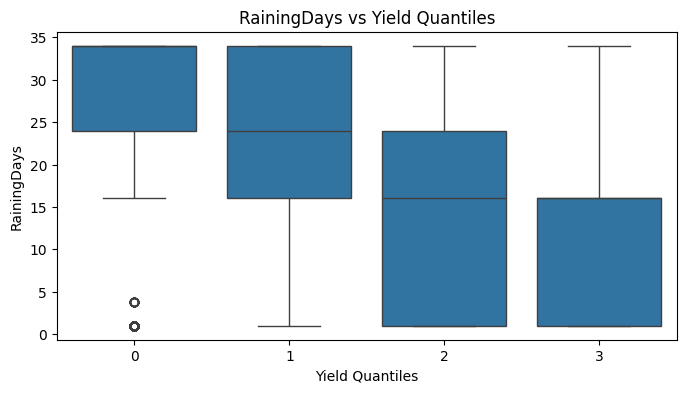

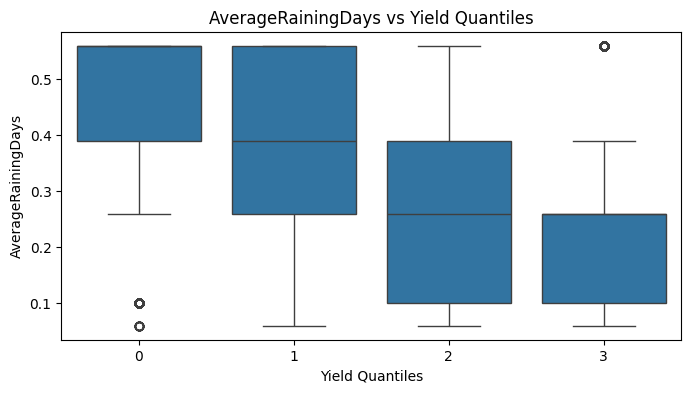

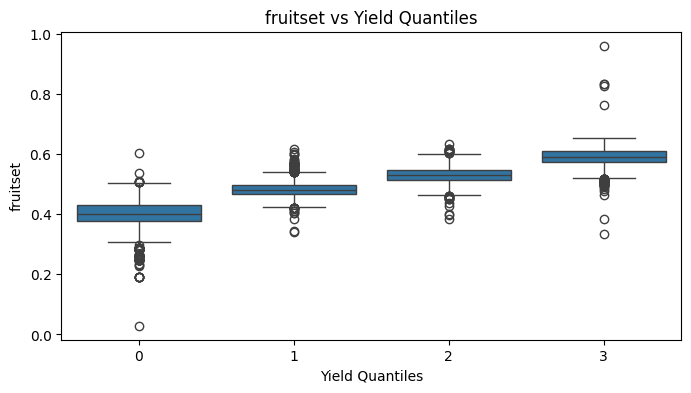

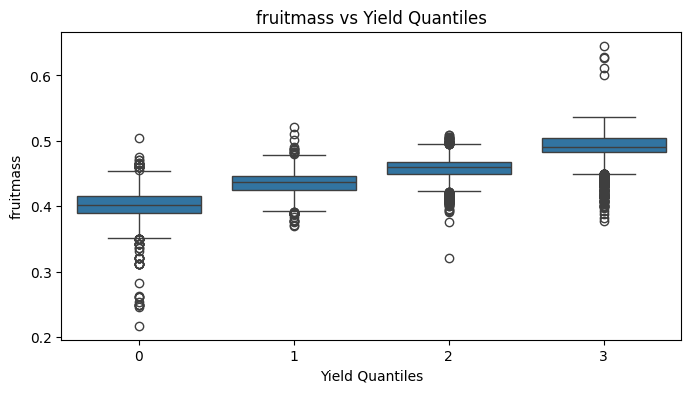

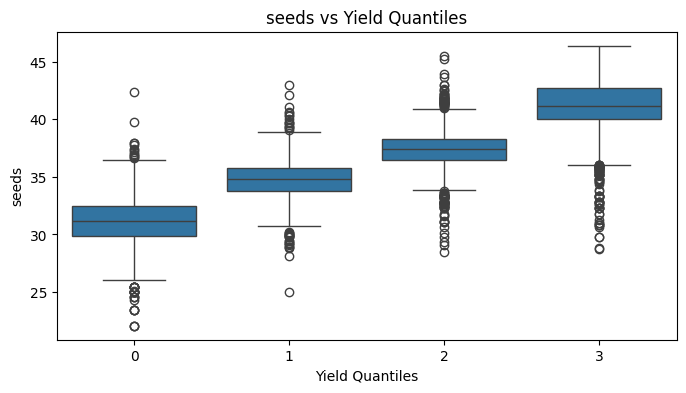

In [12]:
train_df['yield_quantile'] = pd.qcut(train_df['yield'], 4, labels=False)

for column in train_df.columns[2:-2]:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='yield_quantile', y=column, data=train_df)
    plt.title(f"{column} vs Yield Quantiles")
    plt.xlabel("Yield Quantiles")
    plt.ylabel(column)
    plt.show()

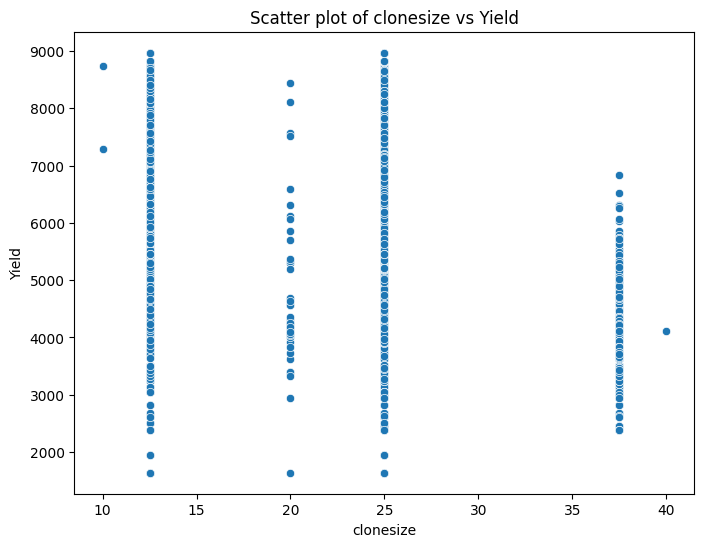

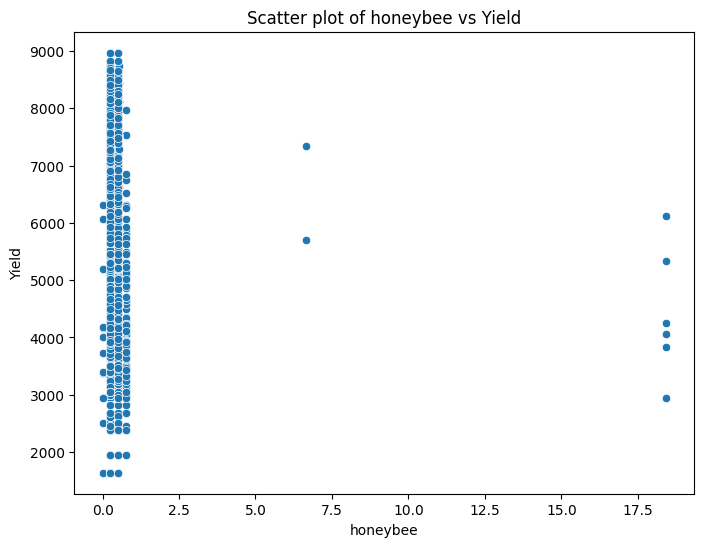

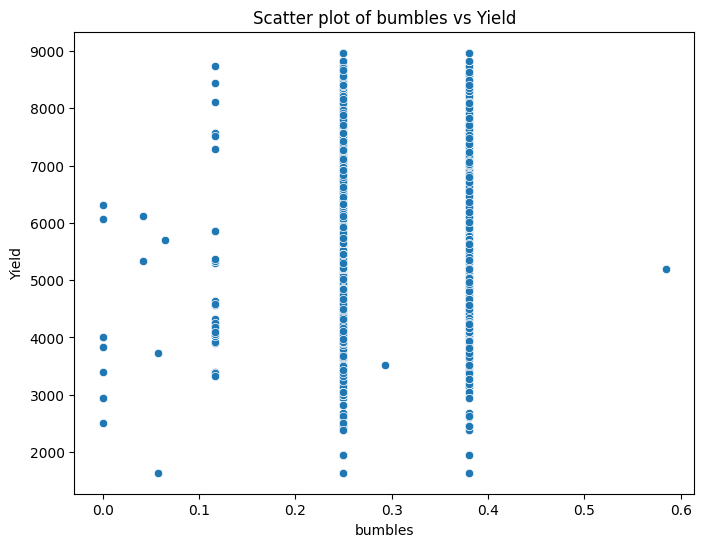

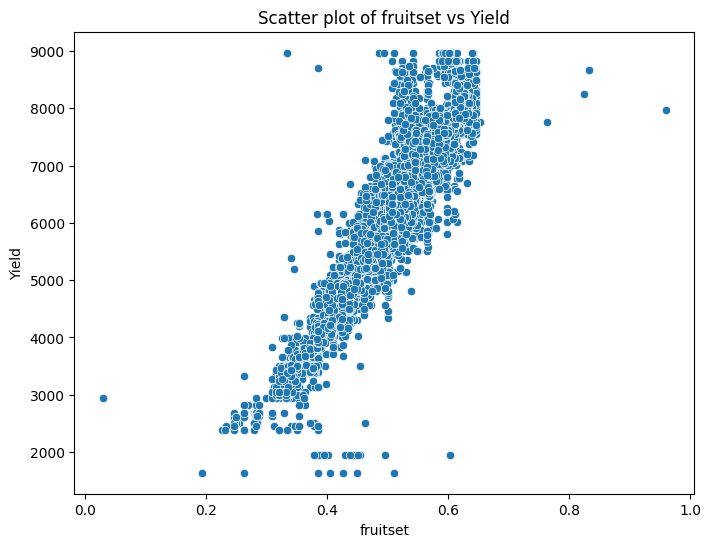

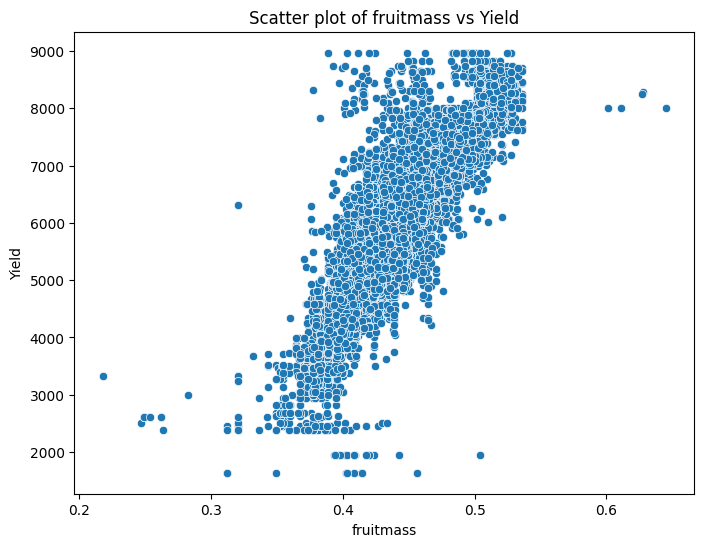

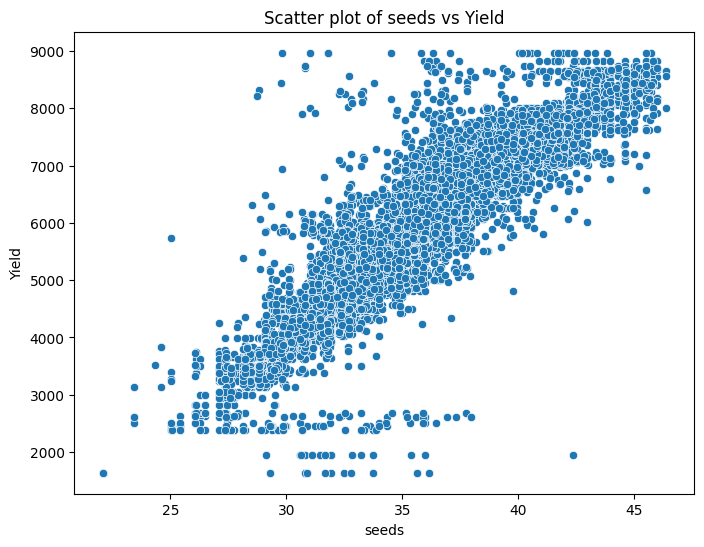

In [13]:
selected_features = ['clonesize', 'honeybee', 'bumbles', 'fruitset', 'fruitmass', 'seeds']

for feature in selected_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=feature, y='yield', data=train_df)
    plt.title(f"Scatter plot of {feature} vs Yield")
    plt.xlabel(feature)
    plt.ylabel("Yield")
    plt.show()

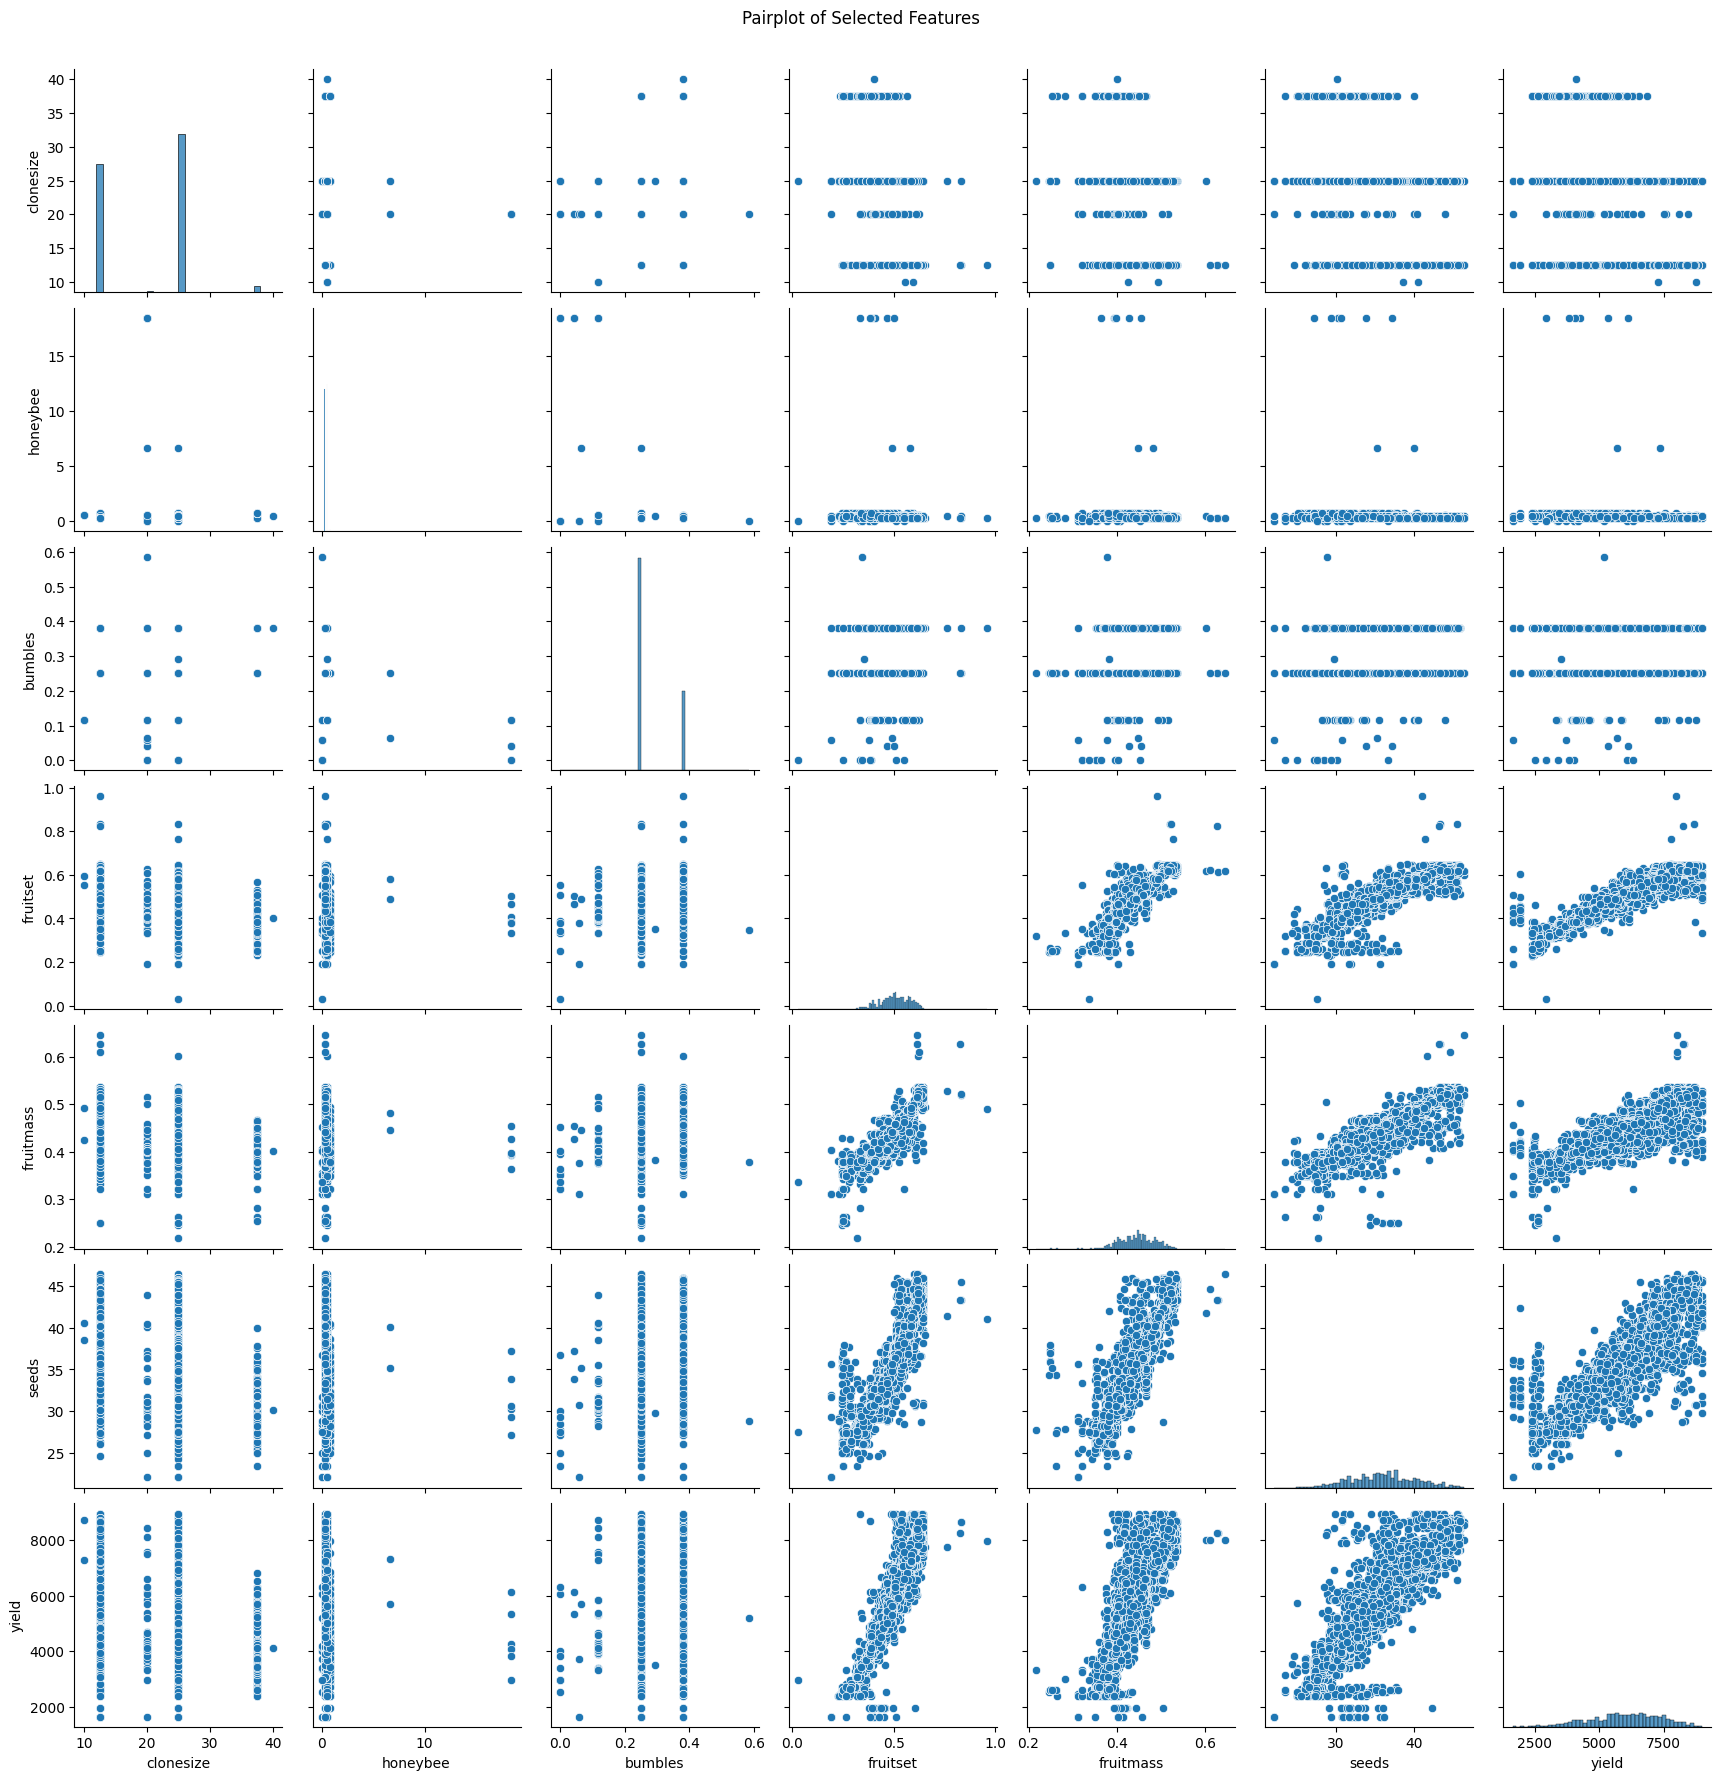

In [14]:
selected_features_pairplot = selected_features + ['yield']
sns.pairplot(train_df[selected_features_pairplot])
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

#### clonesize (cat)

In [15]:
train_df['clonesize'].value_counts()

clonesize
25.0    8104
12.5    6551
37.5     298
20.0      44
10.0       2
40.0       1
Name: count, dtype: int64

In [16]:
train_df['yield'].corr(train_df['clonesize'])

-0.4141962575543229

<Axes: xlabel='clonesize', ylabel='yield'>

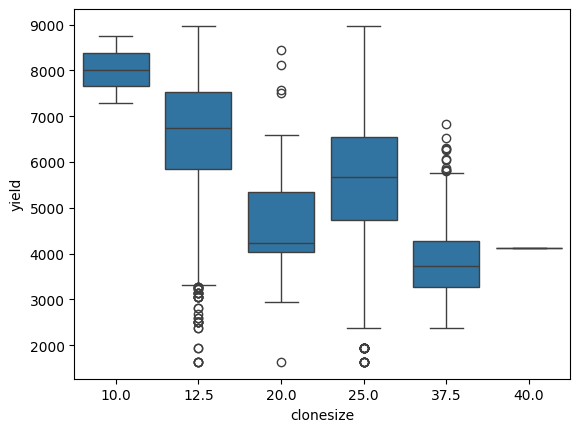

In [17]:
sns.boxplot(data=train_df, x='clonesize', y='yield')

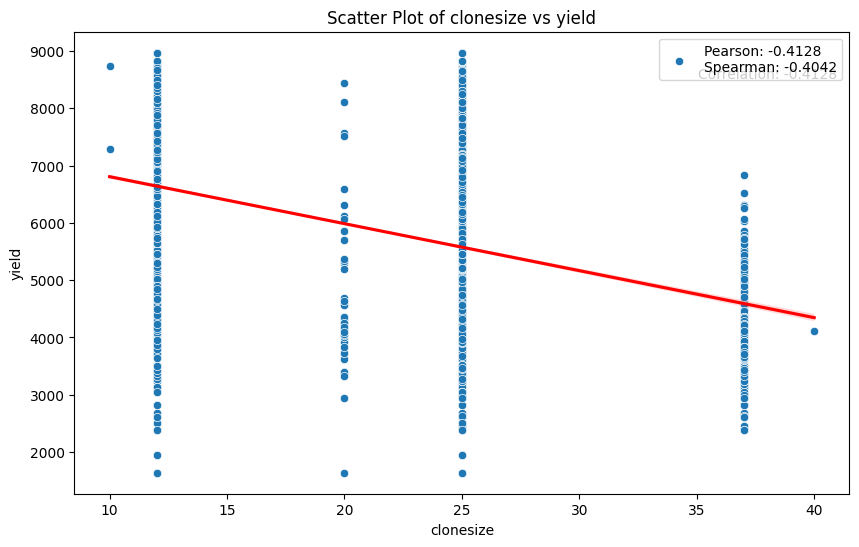

In [18]:
scatter_plot(train_df, 'clonesize', as_type=int)

In [19]:
train_df['clonesize'].unique()

array([12.5, 25. , 37.5, 20. , 40. , 10. ])

In [20]:
test_df['clonesize'].unique()

array([ 12.5,  25. ,  37.5,  20. ,  16. , 120. ])

<Axes: xlabel='clonesize', ylabel='Count'>

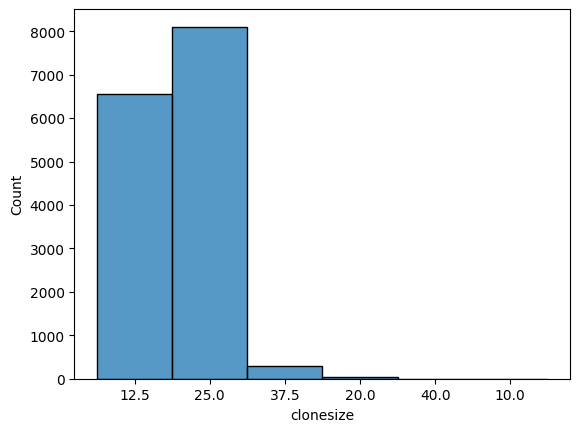

In [21]:
sns.histplot(data=train_df.astype(str), x='clonesize')

<Axes: xlabel='clonesize', ylabel='yield'>

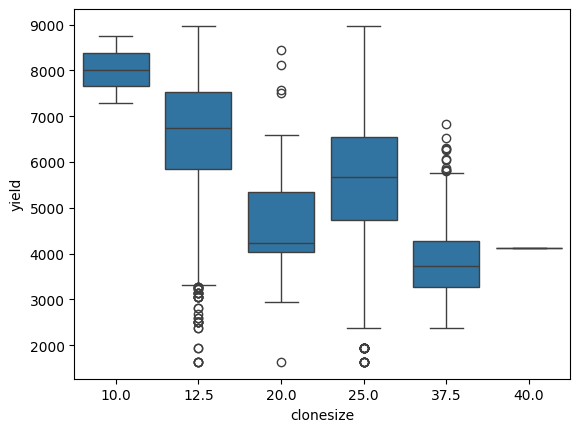

In [22]:
sns.boxplot(data=train_df, x='clonesize', y='yield')

In [23]:
mean_c_yield = train_df.groupby('clonesize')['yield'].mean()
mean_c_yield

clonesize
10.0    8016.813750
12.5    6612.981049
20.0    4721.119979
25.0    5632.431315
37.5    3844.201833
40.0    4112.893490
Name: yield, dtype: float64

In [24]:
train_df['clonesize_mean_yield'] = train_df['clonesize'].map(mean_c_yield).astype(float)

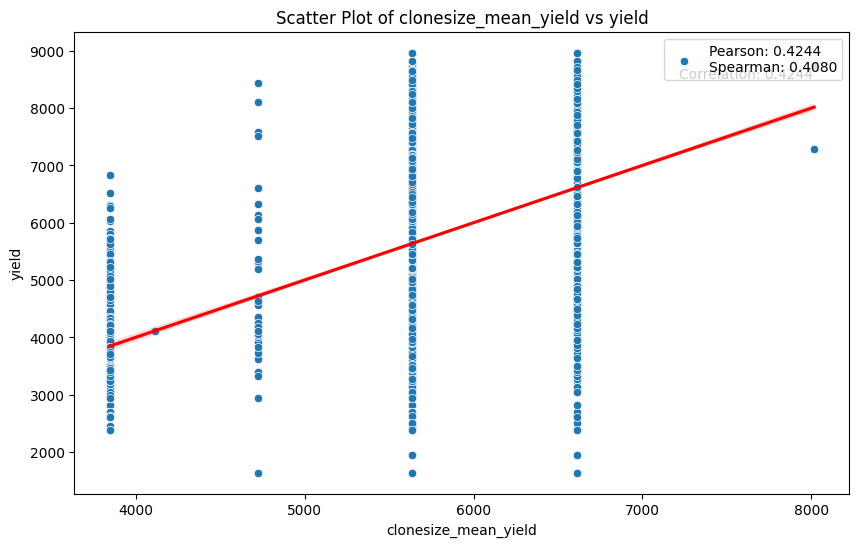

In [25]:
scatter_plot(train_df, 'clonesize_mean_yield', as_type=float)

<Axes: xlabel='yield', ylabel='Count'>

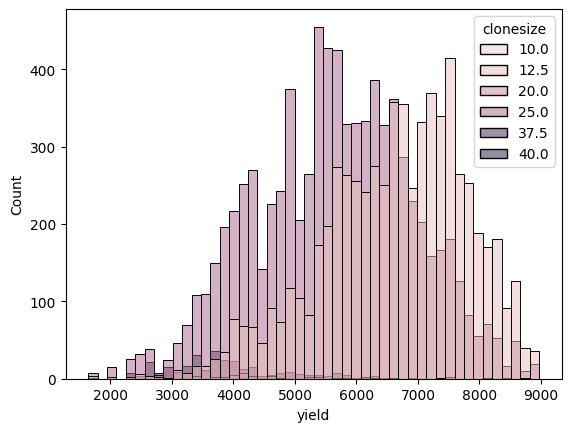

In [26]:
sns.histplot(data=train_df, x='yield', hue='clonesize')

#### honeybee (cat) noise

In [27]:
train_df['yield'].corr(train_df['honeybee'])

-0.10786891603719125

<Axes: xlabel='honeybee', ylabel='yield'>

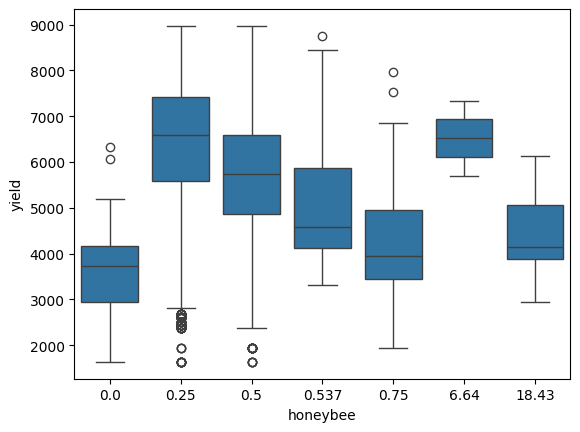

In [28]:
sns.boxplot(data=train_df, x='honeybee', y='yield')

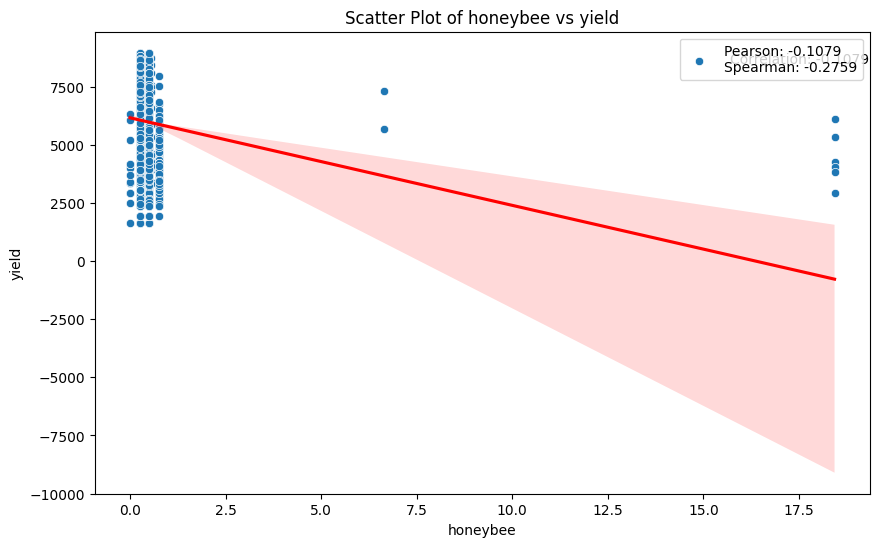

In [29]:
scatter_plot(train_df, 'honeybee', as_type=float)

In [30]:
train_df['honeybee'].unique()

array([ 0.25 ,  0.   ,  0.5  ,  0.75 ,  0.537, 18.43 ,  6.64 ])

In [31]:
test_df['honeybee'].unique()

array([ 0.25 ,  0.5  ,  0.75 ,  0.537,  6.64 ,  0.   , 18.43 ])

In [32]:
honeybee_yield_mean = train_df.groupby('honeybee')['yield'].mean()
rank_honeybee_yield = honeybee_yield_mean.rank()
train_df['honeybee_rank'] = train_df['honeybee'].map(rank_honeybee_yield)
test_df['honeybee_rank'] = test_df['honeybee'].map(rank_honeybee_yield).fillna(0)

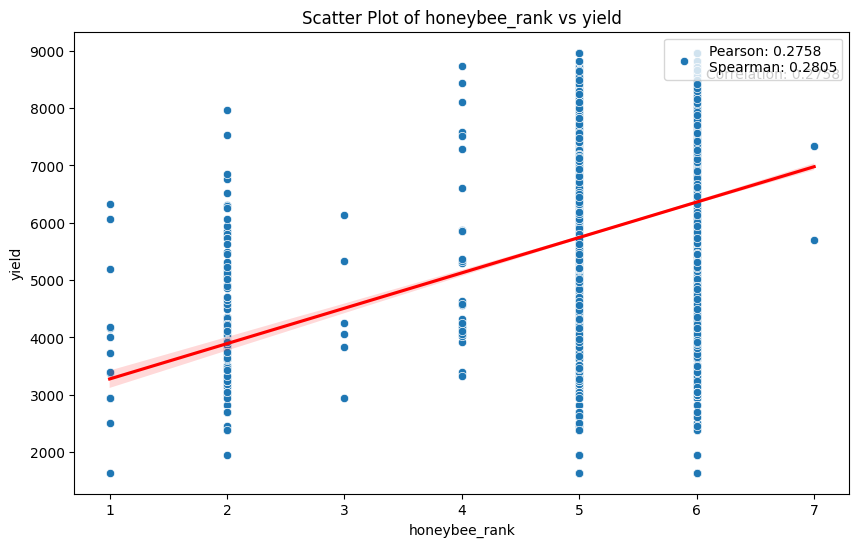

In [33]:
scatter_plot(train_df, 'honeybee_rank')

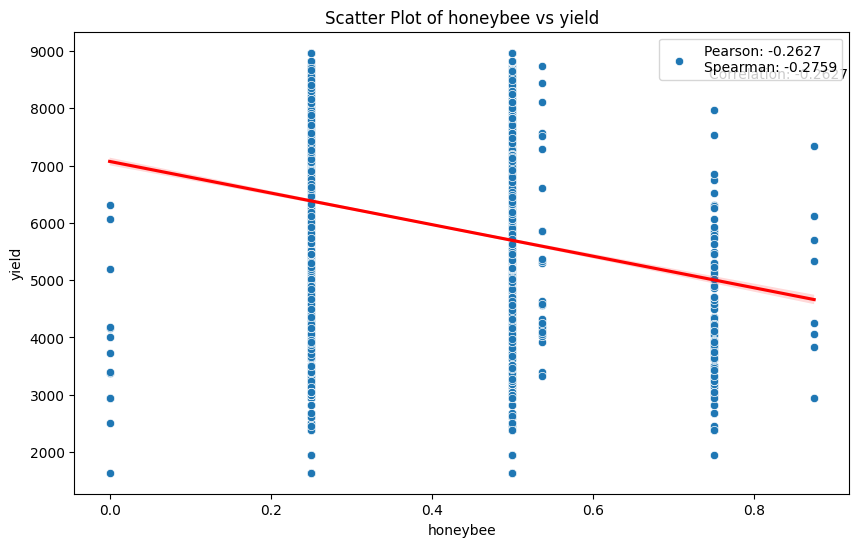

In [34]:
scatter_plot(replace_outliers(train_df, ['honeybee']), 'honeybee')

#### bumbles  (cat) low

In [35]:
train_df['yield'].corr(train_df['bumbles'])

0.17728062361828448

<Axes: xlabel='bumbles', ylabel='yield'>

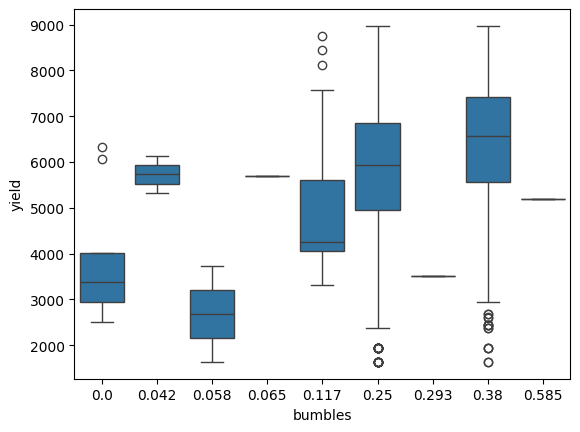

In [36]:
sns.boxplot(data=train_df, x='bumbles', y='yield')

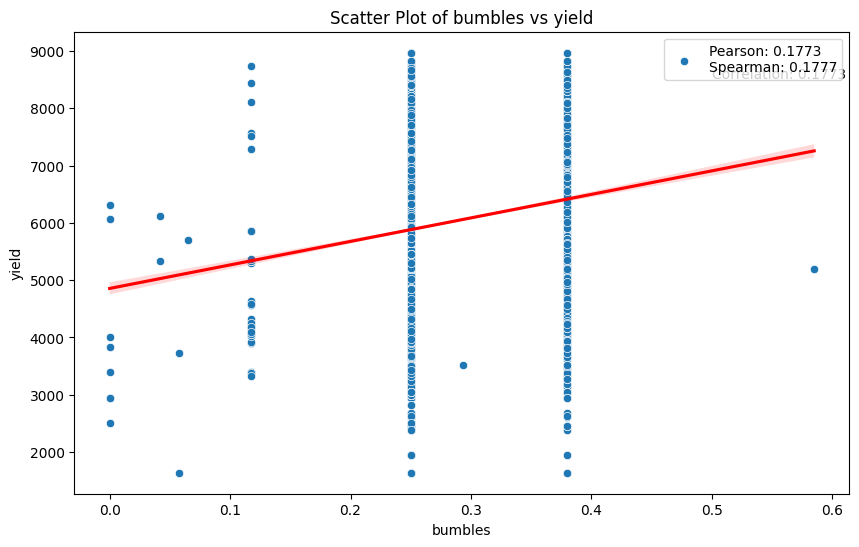

In [37]:
scatter_plot(train_df, 'bumbles')

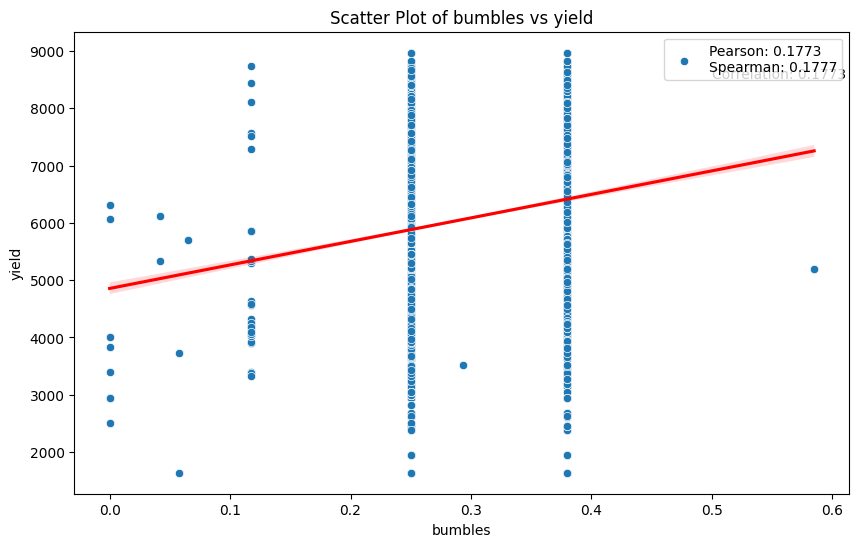

In [38]:
bumbles_lied_mean = train_df.groupby('bumbles')['yield'].mean()
rank_bumbles_yield = bumbles_lied_mean.rank()
train_df['bumbles_rank'] = train_df['bumbles'].map(rank_bumbles_yield)
test_df['bumbles_rank'] = test_df['bumbles'].map(rank_bumbles_yield).fillna(0)
scatter_plot(train_df, 'bumbles')

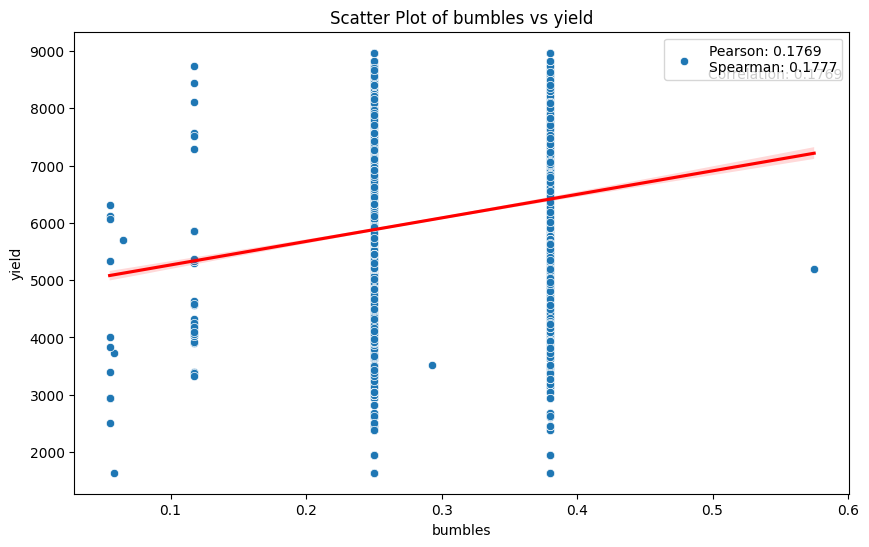

In [39]:
scatter_plot(replace_outliers(train_df, ['bumbles']), 'bumbles')

#### andrena (cat) low

In [40]:
train_df['yield'].corr(train_df['andrena'])

0.12246260125538258

<Axes: xlabel='andrena', ylabel='yield'>

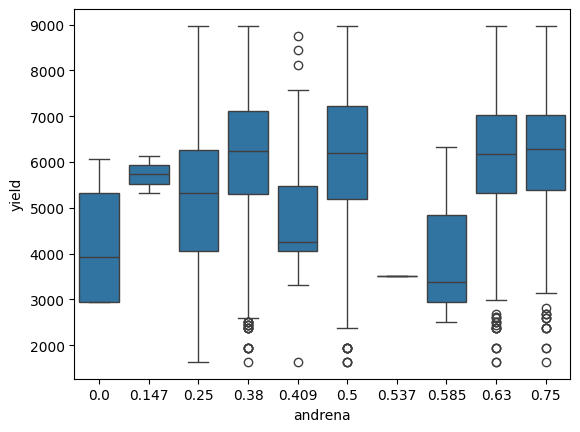

In [41]:
sns.boxplot(data=train_df, x='andrena', y='yield')

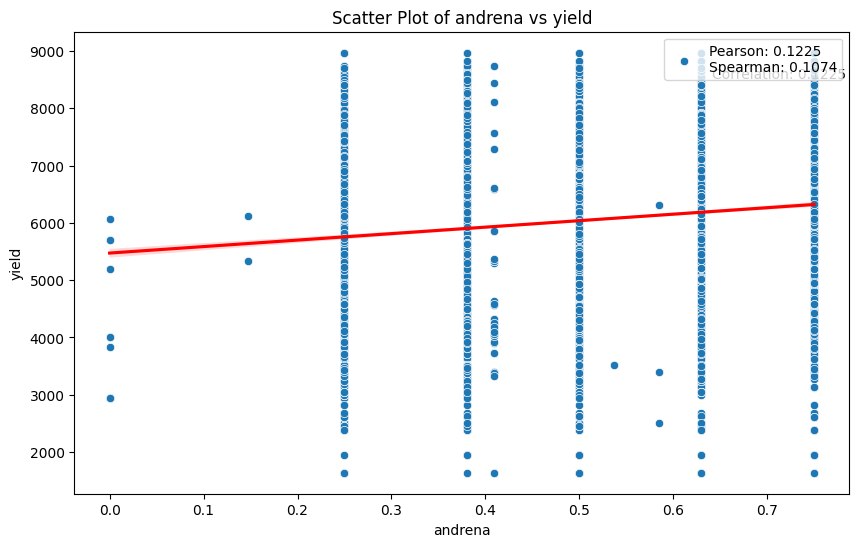

In [42]:
scatter_plot(train_df, 'andrena')

<Axes: xlabel='andrena', ylabel='Count'>

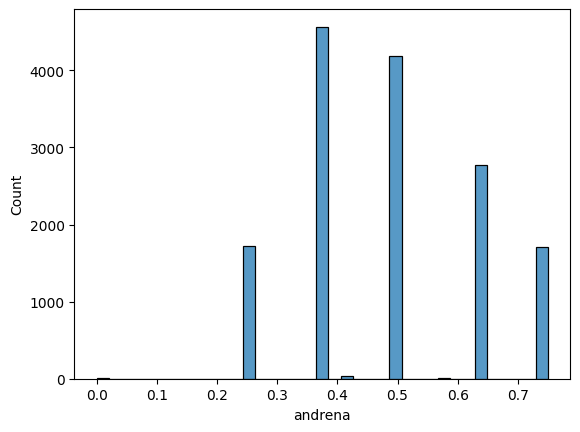

In [43]:
sns.histplot(train_df['andrena'])

In [44]:
train_df['andrena'].unique(), test_df['andrena'].unique()

(array([0.25 , 0.   , 0.75 , 0.38 , 0.5  , 0.63 , 0.409, 0.537, 0.147,
        0.585]),
 array([0.38 , 0.63 , 0.5  , 0.75 , 0.25 , 0.409, 0.147, 0.585, 0.229,
        0.   , 0.83 , 0.234, 0.101]))

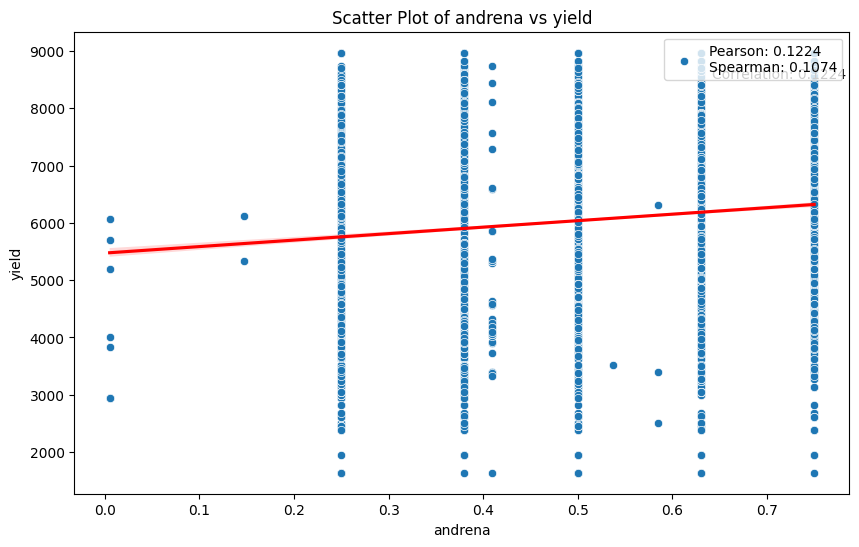

In [45]:
scatter_plot(replace_outliers(train_df, ['andrena']), 'andrena')

#### osmia ( cat )

In [46]:
train_df['yield'].corr(train_df['osmia'])

0.27198932786838015

<Axes: xlabel='osmia', ylabel='yield'>

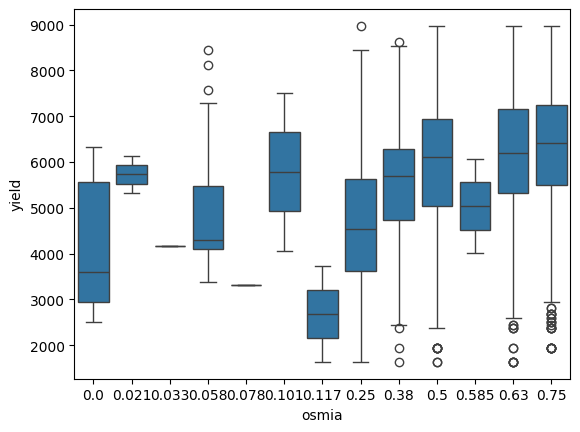

In [47]:
sns.boxplot(data=train_df, x='osmia', y='yield')

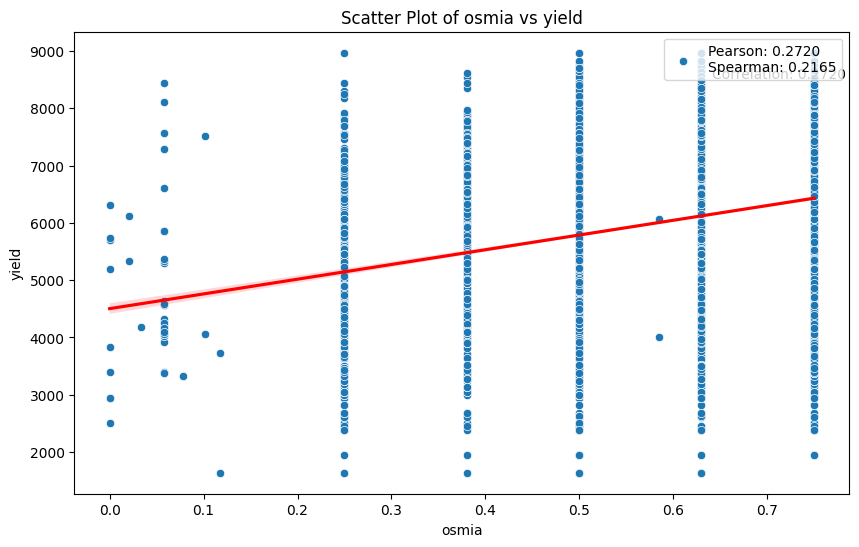

In [48]:
scatter_plot(train_df, 'osmia')

<Axes: xlabel='osmia', ylabel='Count'>

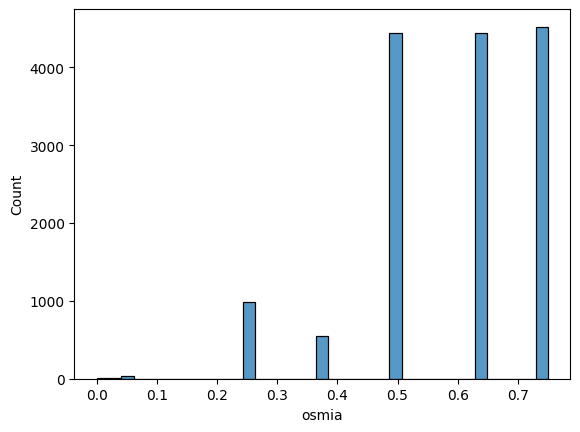

In [49]:
sns.histplot(train_df['osmia'])

In [50]:
train_df['osmia'].unique(), test_df['osmia'].unique()

(array([0.75 , 0.   , 0.63 , 0.5  , 0.25 , 0.38 , 0.058, 0.117, 0.021,
        0.585, 0.101, 0.078, 0.033]),
 array([0.75 , 0.5  , 0.25 , 0.63 , 0.38 , 0.058, 0.021, 0.   , 0.83 ,
        0.117, 0.585]))

In [51]:
mean_osmia_yield = train_df.groupby('osmia')['yield'].mean()
rank_osmia_yield = mean_osmia_yield.rank()
train_df['osmia_rank'] = train_df['osmia'].map(rank_osmia_yield)
test_df['osmia_rank'] = test_df['osmia'].map(rank_osmia_yield).fillna(0)

In [52]:
train_df['yield'].corr(train_df['osmia_rank'])

0.30447565430159096

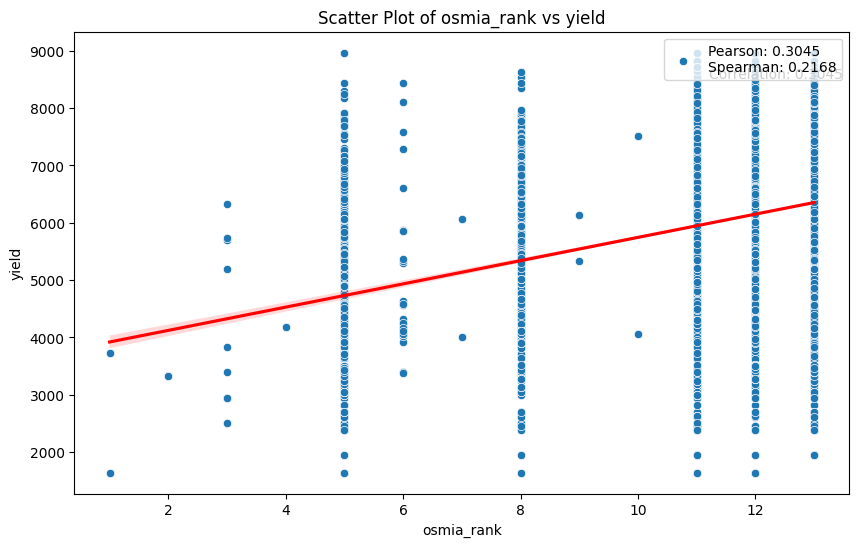

In [53]:
scatter_plot(train_df, 'osmia_rank')

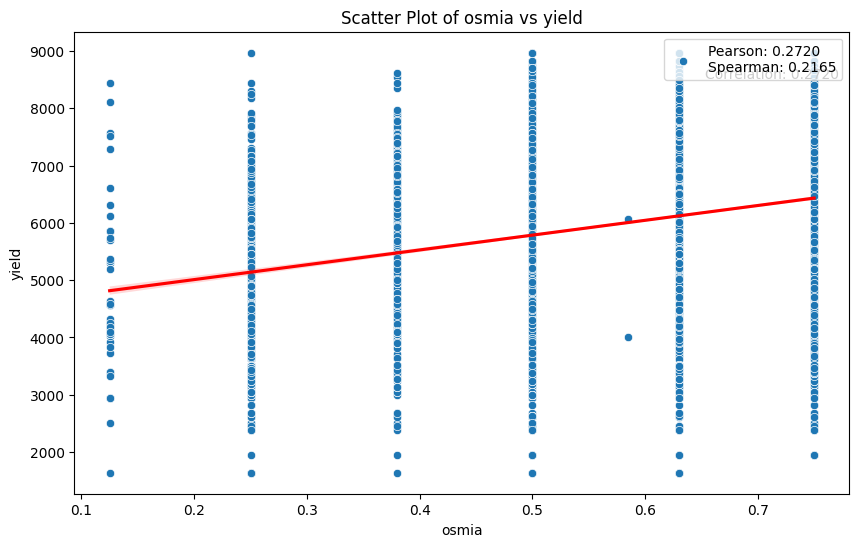

In [54]:
scatter_plot(replace_outliers(train_df, ['osmia']), 'osmia')

#### MaxOfUpperTRange (cat num) bad

<Axes: xlabel='MaxOfUpperTRange', ylabel='yield'>

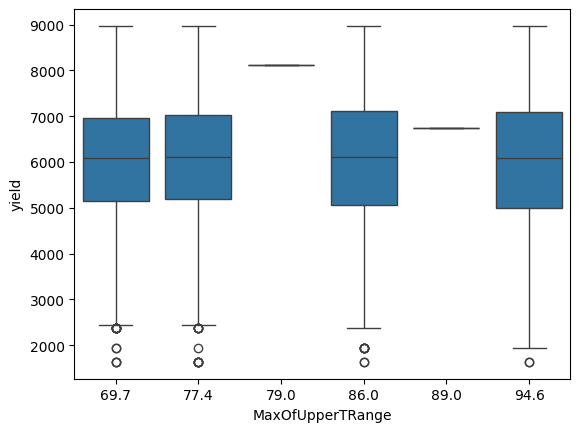

In [55]:
sns.boxplot(data=train_df, x='MaxOfUpperTRange', y='yield')

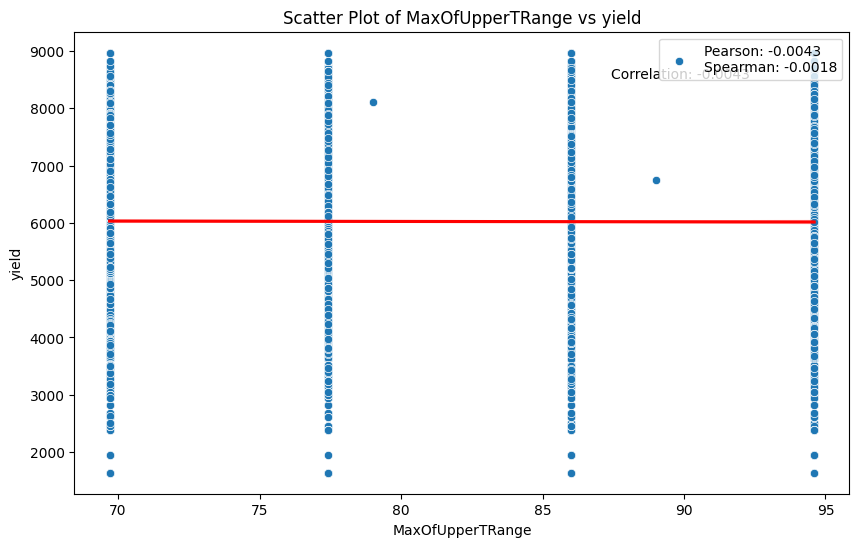

In [56]:
scatter_plot(train_df, "MaxOfUpperTRange")

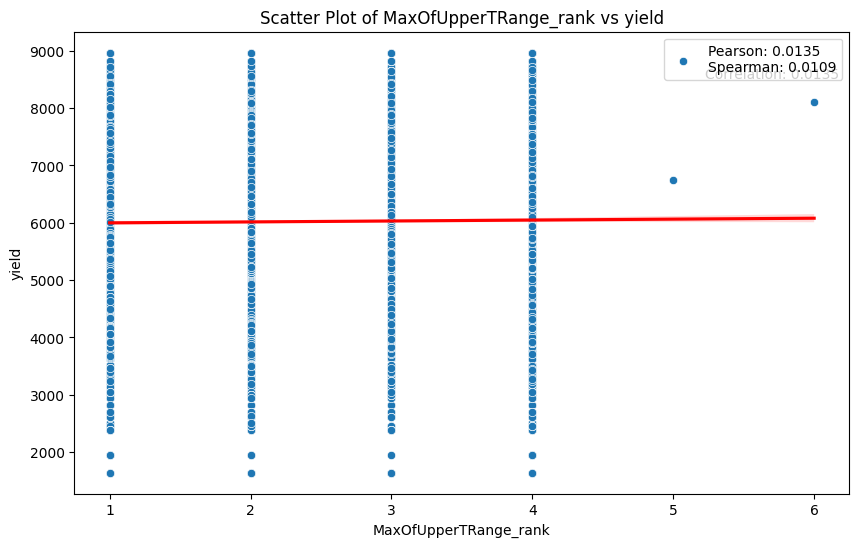

In [57]:
v_mean_yield = train_df.groupby('MaxOfUpperTRange')['yield'].mean()
rank = v_mean_yield.rank()
train_df['MaxOfUpperTRange_rank'] = train_df['MaxOfUpperTRange'].map(rank)
test_df['MaxOfUpperTRange_rank'] = test_df['MaxOfUpperTRange'].map(rank).fillna(0)
scatter_plot(train_df, 'MaxOfUpperTRange_rank')

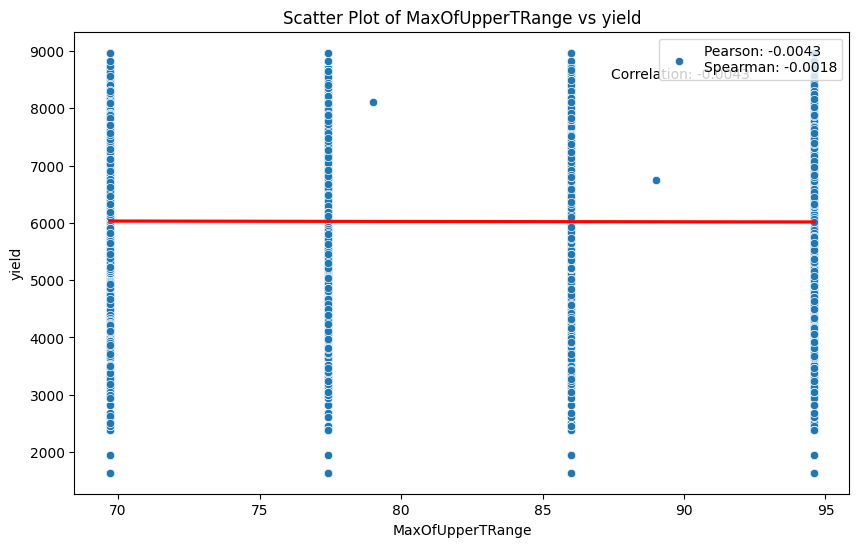

In [58]:
scatter_plot(replace_outliers(train_df, ['MaxOfUpperTRange']), 'MaxOfUpperTRange')

#### MinOfUpperTRange (cat) bad

<Axes: xlabel='MinOfUpperTRange', ylabel='yield'>

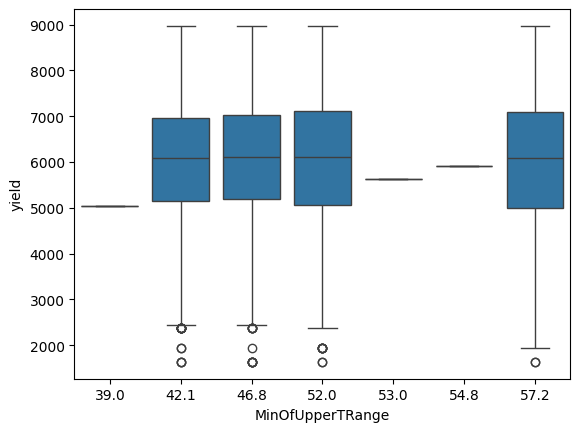

In [59]:
sns.boxplot(data=train_df, x='MinOfUpperTRange', y='yield')

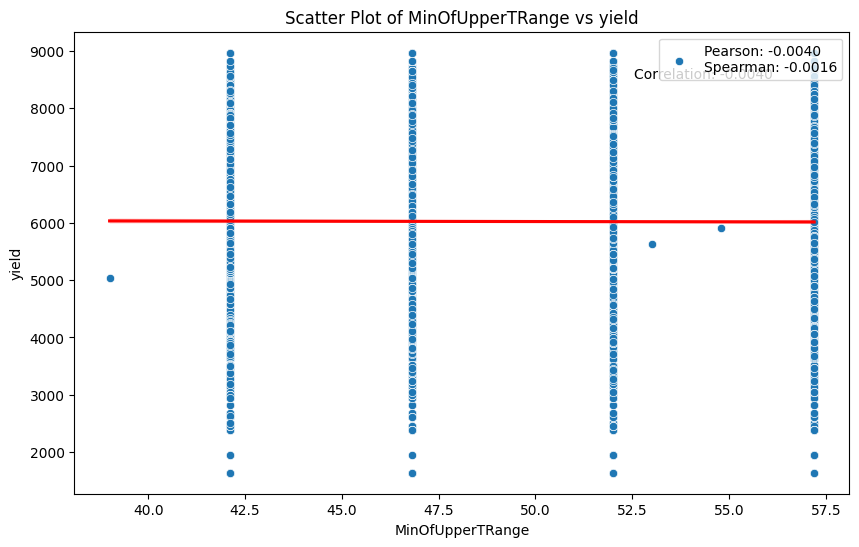

In [60]:
scatter_plot(train_df, 'MinOfUpperTRange')

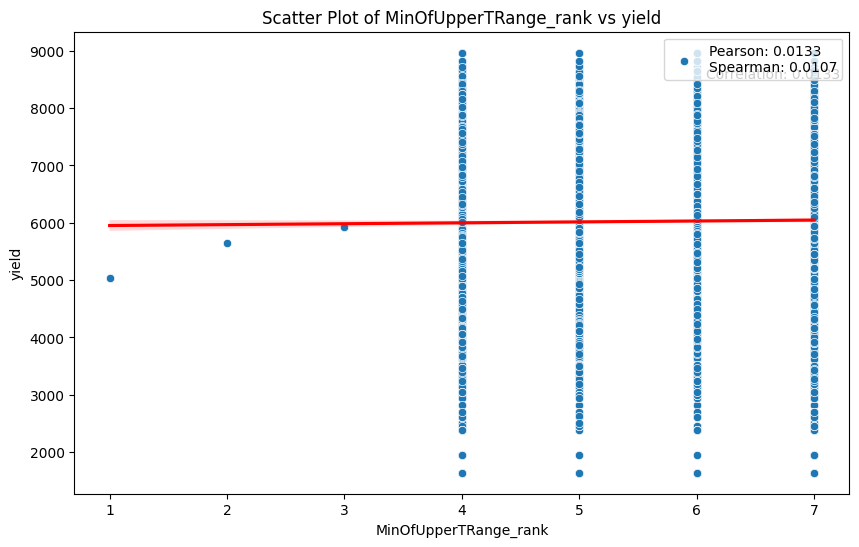

In [61]:
v_mean_yield = train_df.groupby('MinOfUpperTRange')['yield'].mean()
rank = v_mean_yield.rank()
train_df['MinOfUpperTRange_rank'] = train_df['MinOfUpperTRange'].map(rank)
test_df['MinOfUpperTRange_rank'] = test_df['MinOfUpperTRange'].map(rank).fillna(0)
scatter_plot(train_df, 'MinOfUpperTRange_rank')

#### AverageOfUpperTRange (cat) bad

<Axes: xlabel='AverageOfUpperTRange', ylabel='yield'>

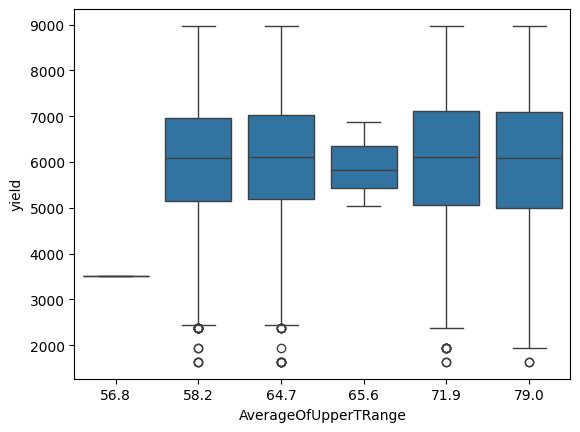

In [62]:
sns.boxplot(data=train_df, x='AverageOfUpperTRange', y='yield')

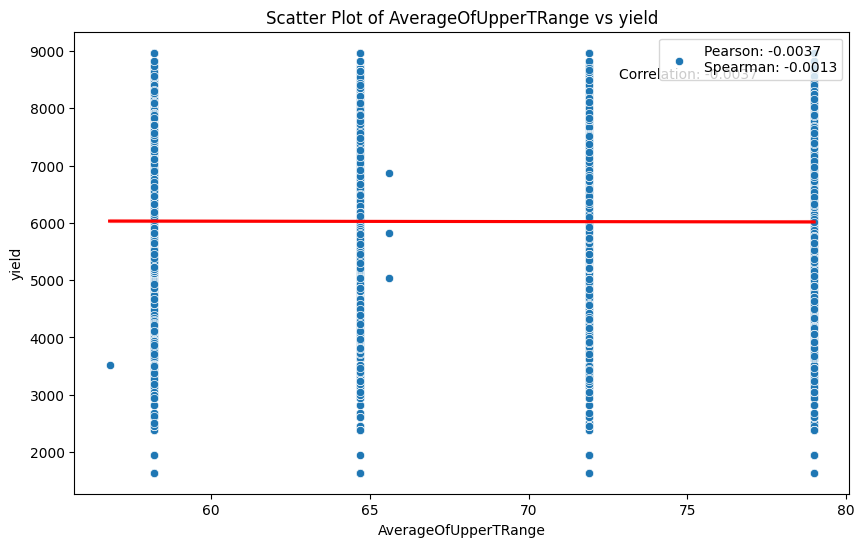

In [63]:
scatter_plot(train_df, 'AverageOfUpperTRange')

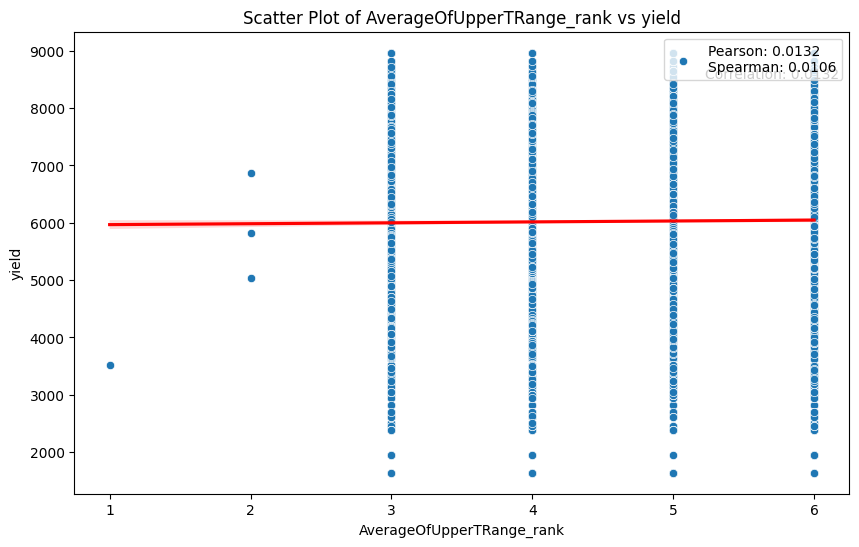

In [64]:
mean_yield = train_df.groupby('AverageOfUpperTRange')['yield'].mean()
rank = mean_yield.rank()
train_df['AverageOfUpperTRange_rank'] = train_df['AverageOfUpperTRange'].map(rank)
test_df['AverageOfUpperTRange_rank'] = test_df['AverageOfUpperTRange'].map(rank).fillna(0)
scatter_plot(train_df, 'AverageOfUpperTRange_rank')

#### MaxOfLowerTRange (cat) bad

<Axes: xlabel='MaxOfLowerTRange', ylabel='yield'>

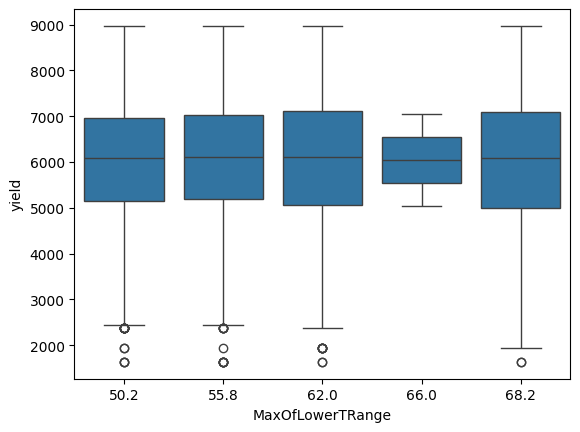

In [65]:
sns.boxplot(data=train_df, x='MaxOfLowerTRange', y='yield')

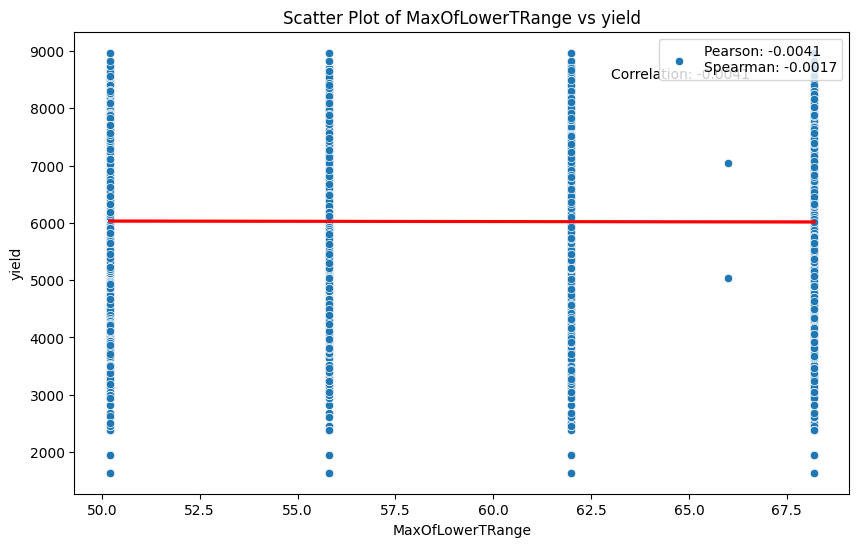

In [66]:
scatter_plot(train_df, 'MaxOfLowerTRange')

In [67]:
train_df['MaxOfLowerTRange'].unique(), test_df['MaxOfLowerTRange'].unique()

(array([50.2, 62. , 55.8, 68.2, 66. ]),
 array([50.2, 68.2, 55.8, 62. , 72.9, 66. ]))

In [68]:
test_df['MaxOfLowerTRange'].value_counts()

MaxOfLowerTRange
62.0    2815
55.8    2492
68.2    2469
50.2    2222
72.9       1
66.0       1
Name: count, dtype: int64

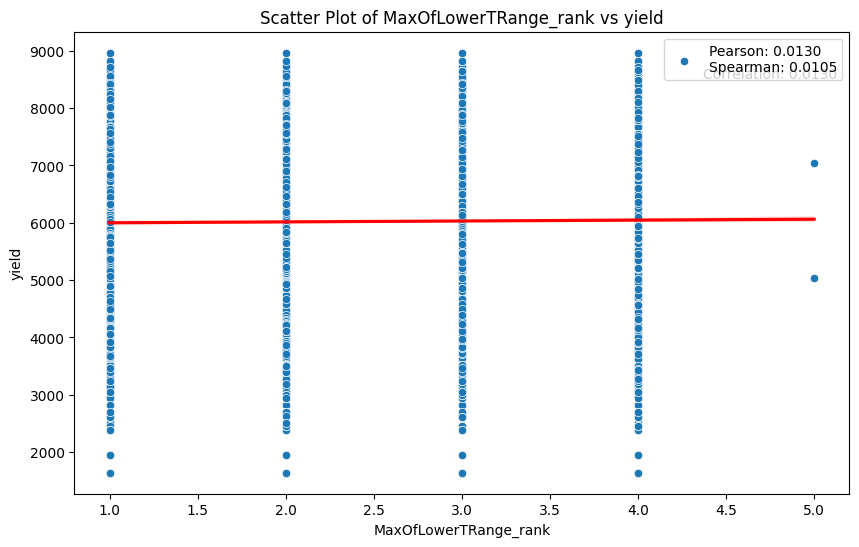

In [69]:
mean_yield = train_df.groupby('MaxOfLowerTRange')['yield'].mean()
rank = mean_yield.rank()
train_df['MaxOfLowerTRange_rank'] = train_df['MaxOfLowerTRange'].map(rank)
test_df['MaxOfLowerTRange_rank'] = test_df['MaxOfLowerTRange'].map(rank).fillna(0)
scatter_plot(train_df, 'MaxOfLowerTRange_rank')

#### MinOfLowerTRange (cat) bad

<Axes: xlabel='MinOfLowerTRange', ylabel='yield'>

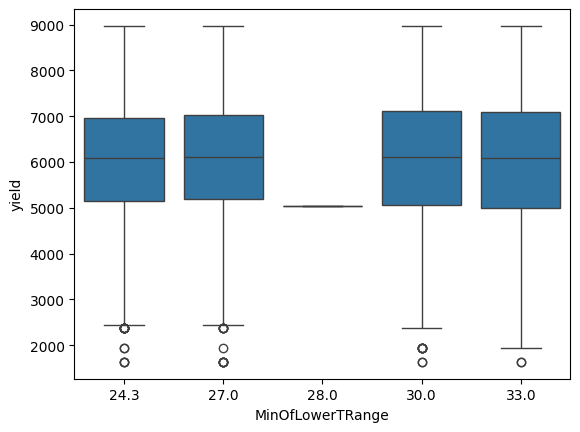

In [70]:
sns.boxplot(data=train_df, x='MinOfLowerTRange', y='yield')

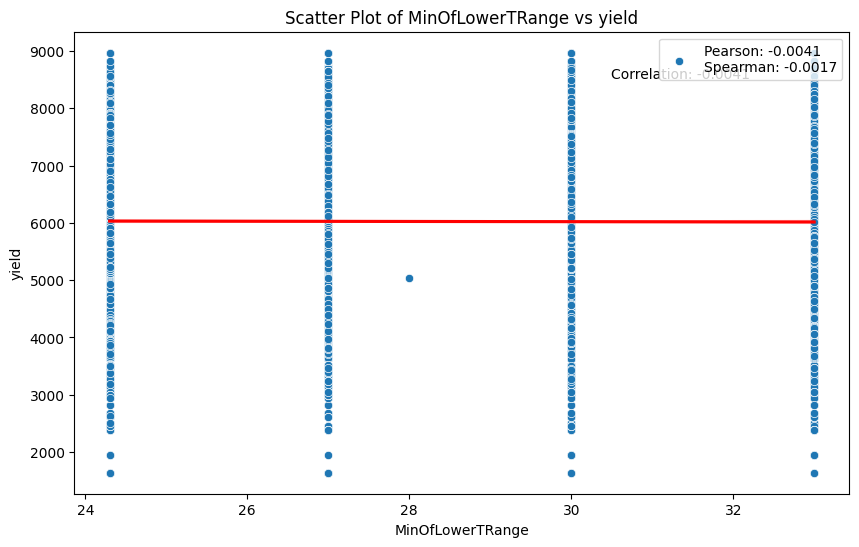

In [71]:
scatter_plot(train_df, 'MinOfLowerTRange')

In [72]:
train_df['MinOfLowerTRange'].unique(), test_df['MinOfLowerTRange'].unique()

(array([24.3, 30. , 27. , 33. , 28. ]), array([24.3, 33. , 27. , 30. ]))

In [73]:
train_df['MinOfLowerTRange'].value_counts()

MinOfLowerTRange
30.0    4253
27.0    3663
33.0    3640
24.3    3443
28.0       1
Name: count, dtype: int64

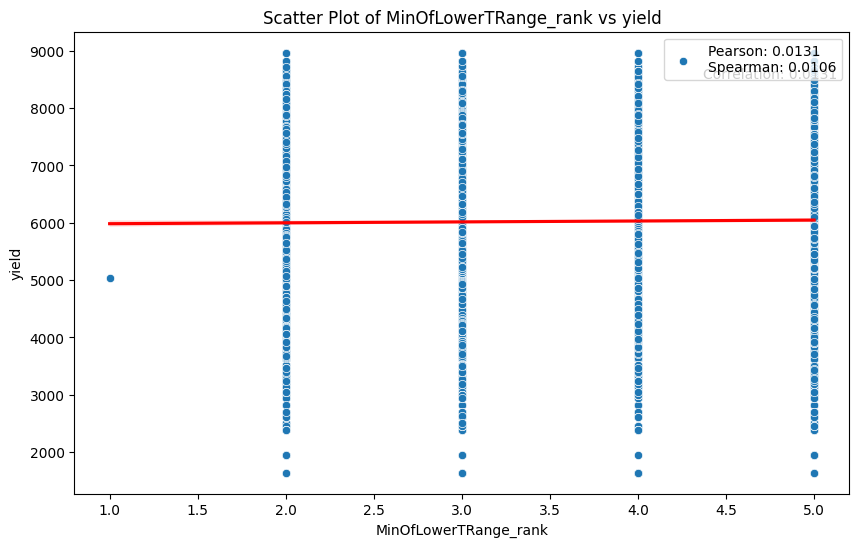

In [74]:
mean_yield = train_df.groupby('MinOfLowerTRange')['yield'].mean()
rank = mean_yield.rank()
train_df['MinOfLowerTRange_rank'] = train_df['MinOfLowerTRange'].map(rank)
test_df['MinOfLowerTRange_rank'] = test_df['MinOfLowerTRange'].map(rank).fillna(0)
scatter_plot(train_df, 'MinOfLowerTRange_rank')

#### AverageOfLowerTRange (cat) bad

<Axes: xlabel='AverageOfLowerTRange', ylabel='yield'>

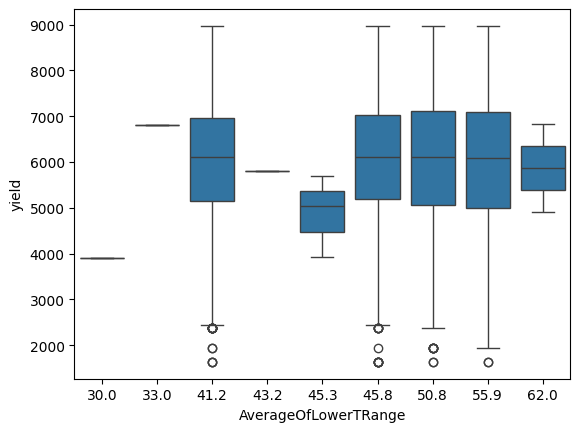

In [75]:
sns.boxplot(data=train_df, x='AverageOfLowerTRange', y='yield')

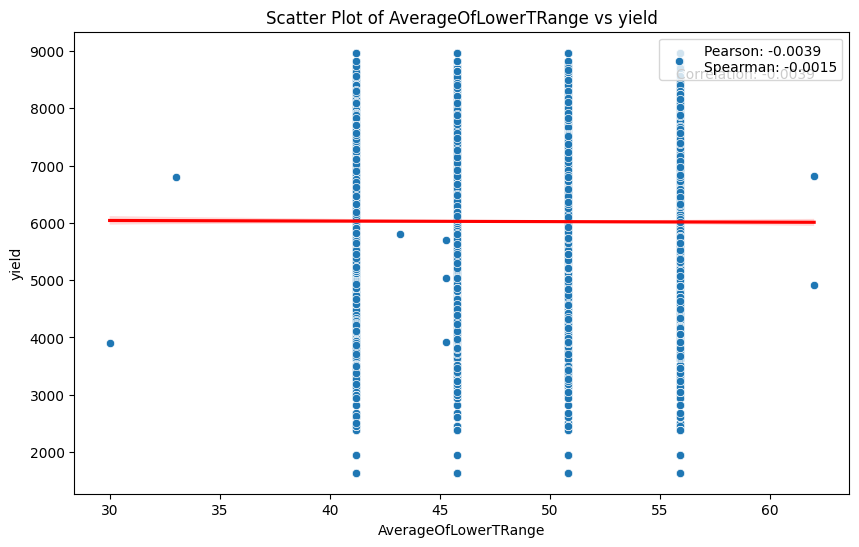

In [76]:
scatter_plot(train_df, 'AverageOfLowerTRange')

In [77]:
train_df['AverageOfLowerTRange'].unique(), test_df['AverageOfLowerTRange'].unique()

(array([41.2, 50.8, 45.8, 55.9, 45.3, 62. , 43.2, 30. , 33. ]),
 array([41.2, 55.9, 45.8, 50.8, 30. , 43.2, 40.8, 45.3]))

In [78]:
test_df.value_counts('AverageOfLowerTRange')

AverageOfLowerTRange
50.8    2814
45.8    2492
55.9    2469
41.2    2221
30.0       1
40.8       1
43.2       1
45.3       1
Name: count, dtype: int64

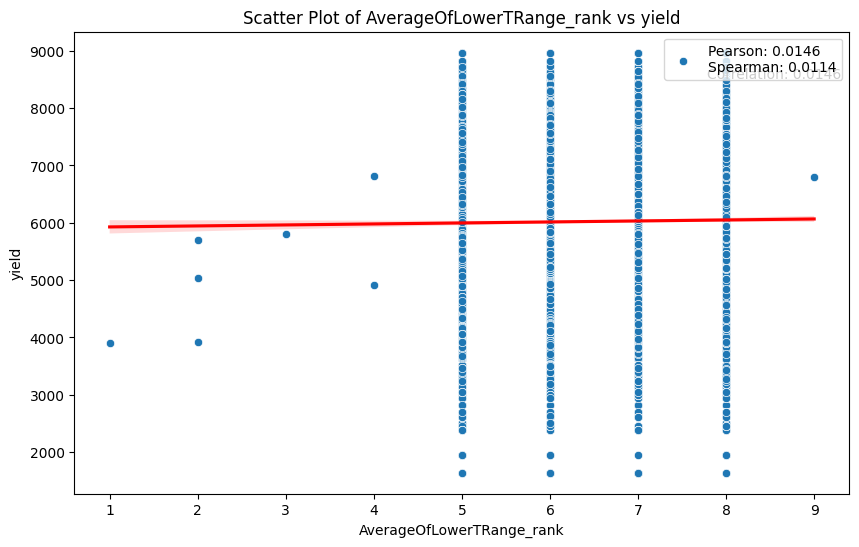

In [79]:
mean_yield = train_df.groupby('AverageOfLowerTRange')['yield'].mean()
rank = mean_yield.rank()
train_df['AverageOfLowerTRange_rank'] = train_df['AverageOfLowerTRange'].map(rank)
test_df['AverageOfLowerTRange_rank'] = test_df['AverageOfLowerTRange'].map(rank).fillna(0)
scatter_plot(train_df, 'AverageOfLowerTRange_rank')

#### RainingDays (cat num )

<Axes: xlabel='RainingDays', ylabel='yield'>

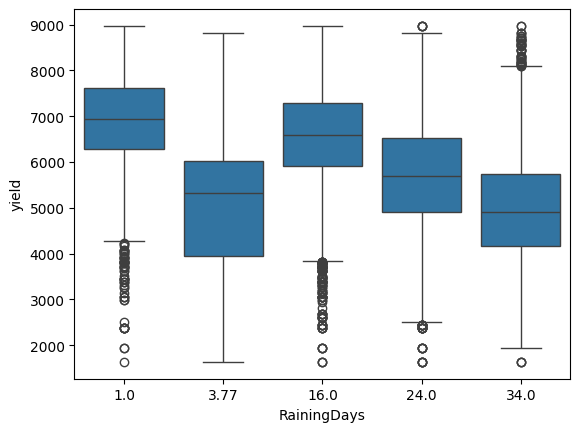

In [80]:
sns.boxplot(data=train_df, x='RainingDays', y='yield')

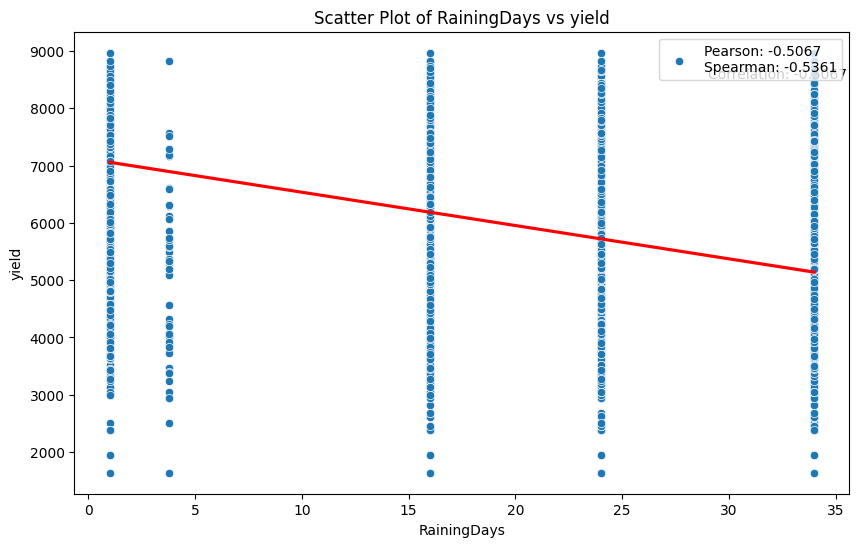

In [81]:
scatter_plot(train_df, 'RainingDays')

In [82]:
train_df['RainingDays'].unique(), test_df['RainingDays'].unique()

(array([16.  ,  3.77, 34.  , 24.  ,  1.  ]),
 array([34.  ,  1.  , 24.  , 16.  ,  3.77]))

In [83]:
test_df['RainingDays'].value_counts()

RainingDays
16.00    2719
24.00    2556
1.00     2374
34.00    2320
3.77       31
Name: count, dtype: int64

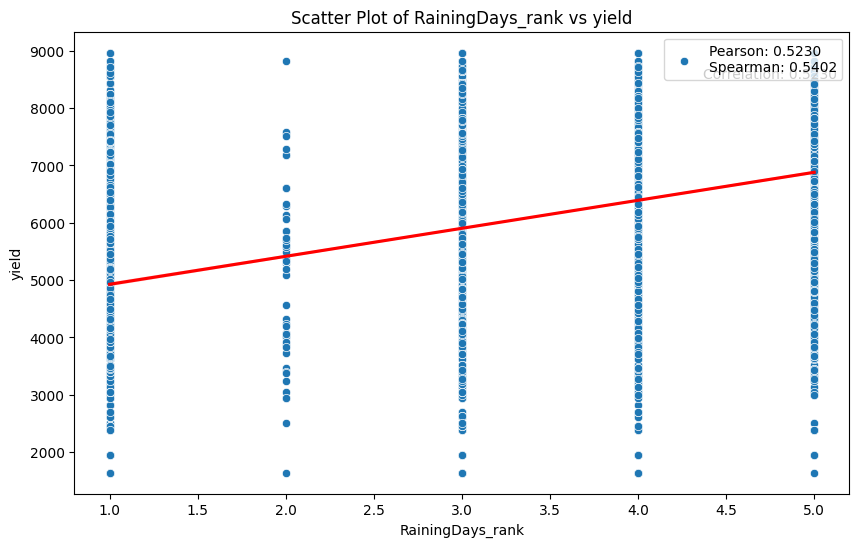

In [84]:
mean_yield = train_df.groupby('RainingDays')['yield'].mean()
rank = mean_yield.rank()
train_df['RainingDays_rank'] = train_df['RainingDays'].map(rank)
test_df['RainingDays_rank'] = test_df['RainingDays'].map(rank).fillna(0)
scatter_plot(train_df, 'RainingDays_rank')

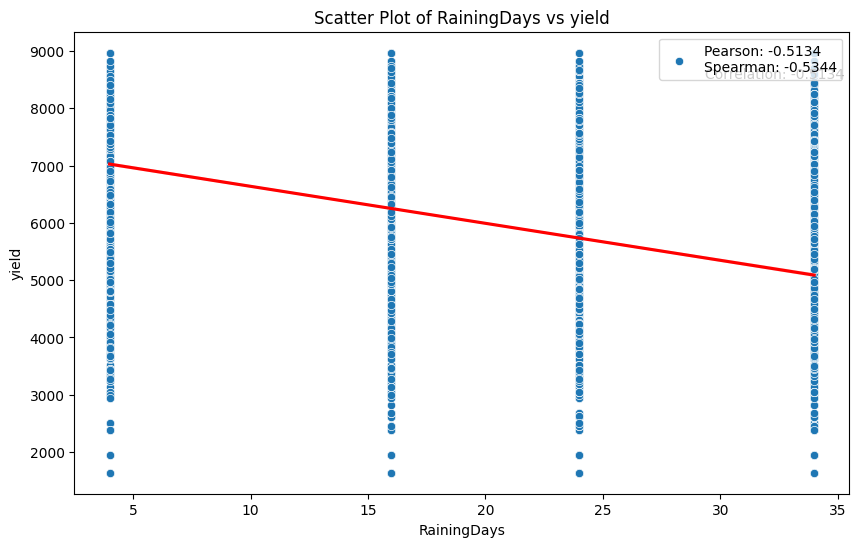

In [85]:
scatter_plot(replace_outliers(train_df, ['RainingDays']), 'RainingDays')

#### AverageRainingDays (cat)

<Axes: xlabel='AverageRainingDays', ylabel='yield'>

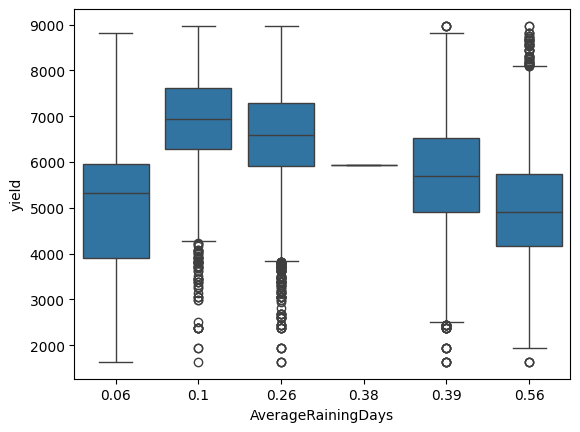

In [86]:
sns.boxplot(data=train_df, x='AverageRainingDays', y='yield')

In [87]:
train_df['AverageRainingDays'].unique()

array([0.26, 0.06, 0.56, 0.39, 0.1 , 0.38])

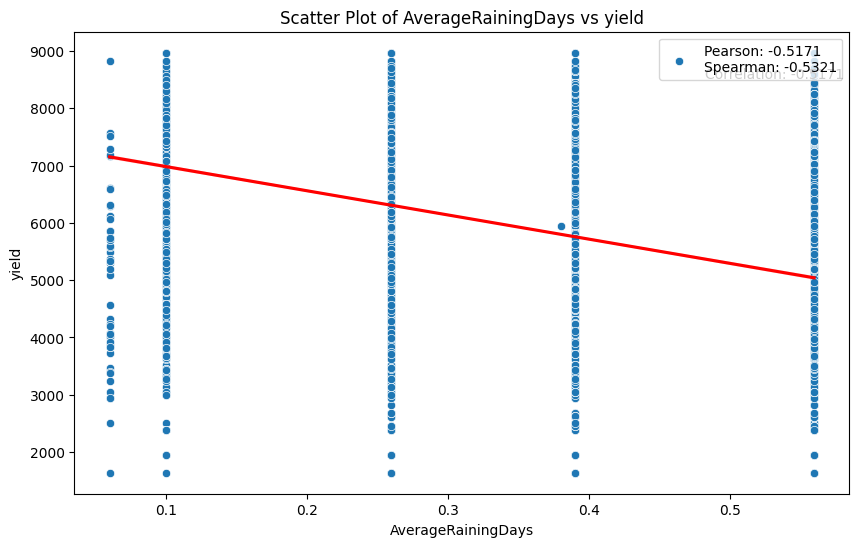

In [88]:
scatter_plot(train_df, 'AverageRainingDays')

<Axes: xlabel='yield', ylabel='Count'>

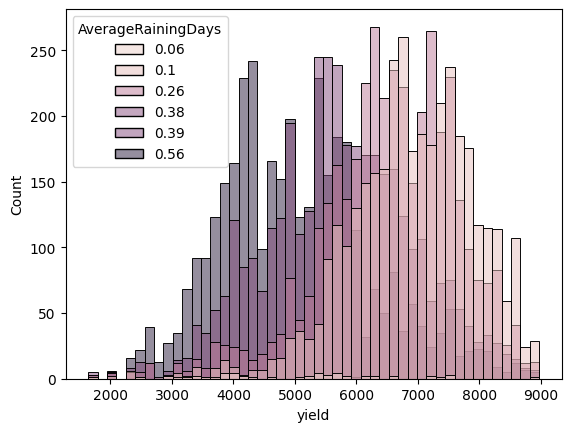

In [89]:
sns.histplot(data=train_df, hue='AverageRainingDays', x='yield')

In [90]:
train_df['AverageRainingDays'].unique(), test_df['AverageRainingDays'].unique()

(array([0.26, 0.06, 0.56, 0.39, 0.1 , 0.38]),
 array([0.56, 0.1 , 0.39, 0.26, 0.06, 0.27]))

In [91]:
test_df['AverageRainingDays'].value_counts()

AverageRainingDays
0.26    2719
0.39    2556
0.10    2374
0.56    2319
0.06      31
0.27       1
Name: count, dtype: int64

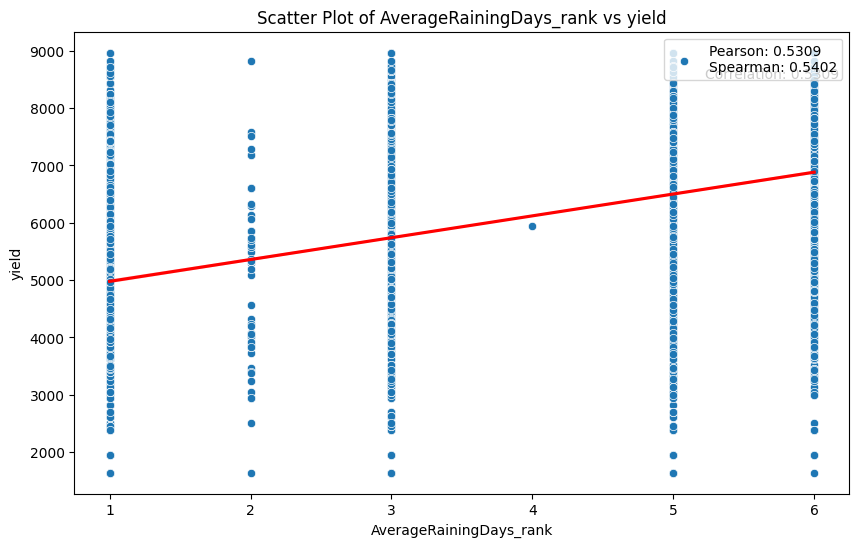

In [92]:
mean_yield = train_df.groupby('AverageRainingDays')['yield'].mean()
rank = mean_yield.rank()
train_df['AverageRainingDays_rank'] = train_df['AverageRainingDays'].map(rank)
test_df['AverageRainingDays_rank'] = test_df['AverageRainingDays'].map(rank).fillna(0)
scatter_plot(train_df, 'AverageRainingDays_rank')

#### fruitset

<Axes: ylabel='fruitset'>

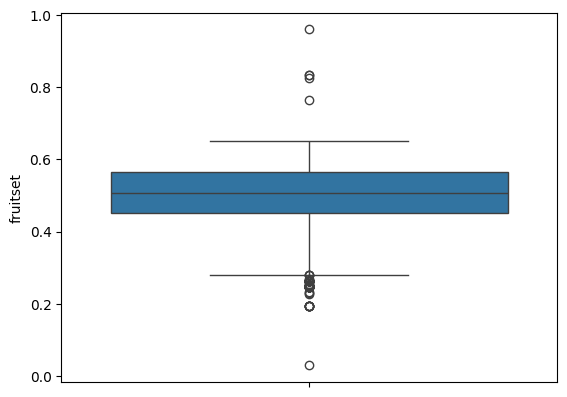

In [93]:
sns.boxplot(data=train_df, y='fruitset')

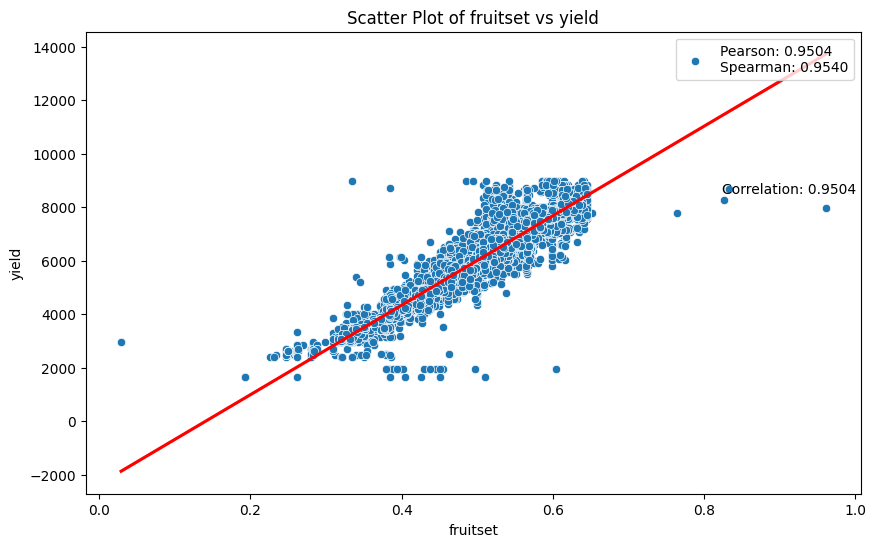

In [94]:
scatter_plot(train_df, 'fruitset')

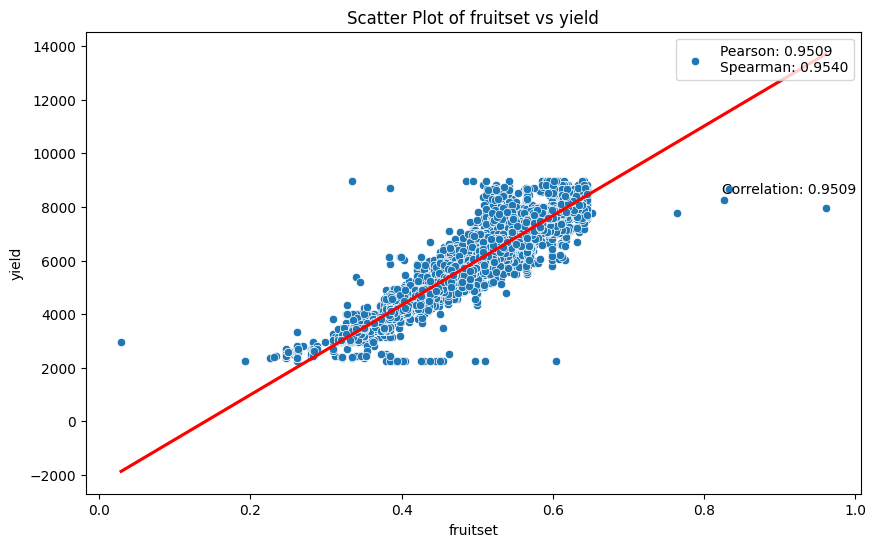

In [95]:
scatter_plot(replace_outliers(train_df, ['yield']), 'fruitset')

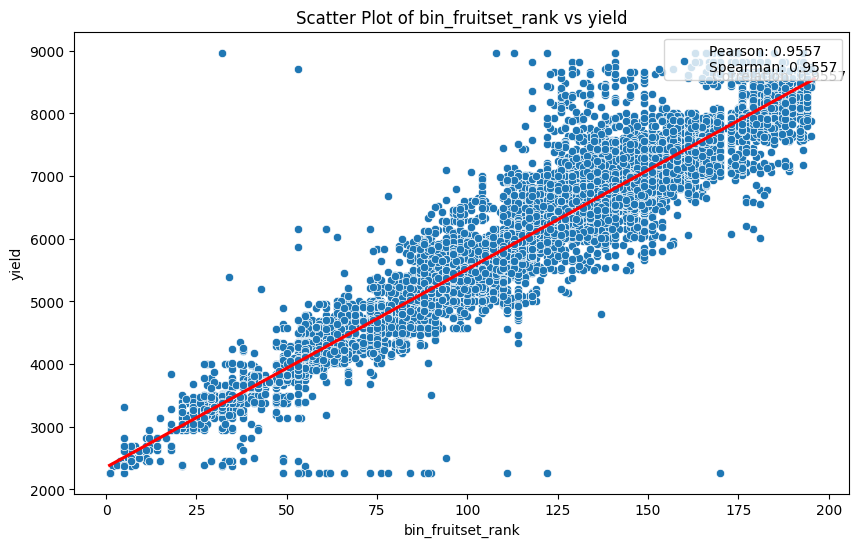

In [96]:
combined_seeds = pd.concat([train_df['fruitset'], test_df['fruitset']])

bin_fruitset = pd.cut(combined_seeds, bins=500, retbins=True)[1]
train_df['binned_fruitset'] = pd.cut(train_df['fruitset'], bins=bin_fruitset, labels=False, include_lowest=True)
test_df['binned_fruitset'] = pd.cut(test_df['fruitset'], bins=bin_fruitset, labels=False, include_lowest=True)

mean_yield = train_df.groupby('binned_fruitset')['yield'].mean()
rank = mean_yield.rank()
train_df['bin_fruitset_rank'] = train_df['binned_fruitset'].map(rank)
test_df['bin_fruitset_rank'] = test_df['binned_fruitset'].map(rank)
train_df.drop('binned_fruitset', axis=1, inplace=True)
scatter_plot(train_df, 'bin_fruitset_rank')

#### fruitmass

<Axes: ylabel='fruitmass'>

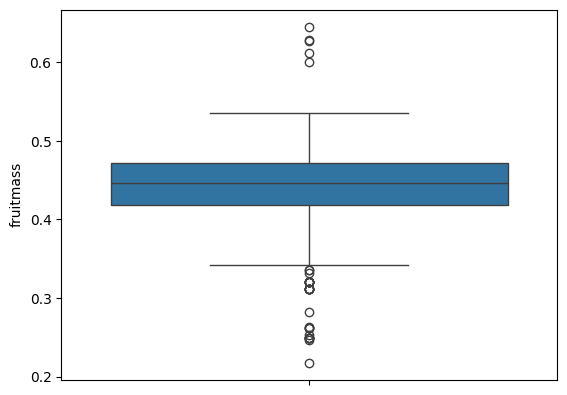

In [97]:
sns.boxplot(data=train_df, y='fruitmass')

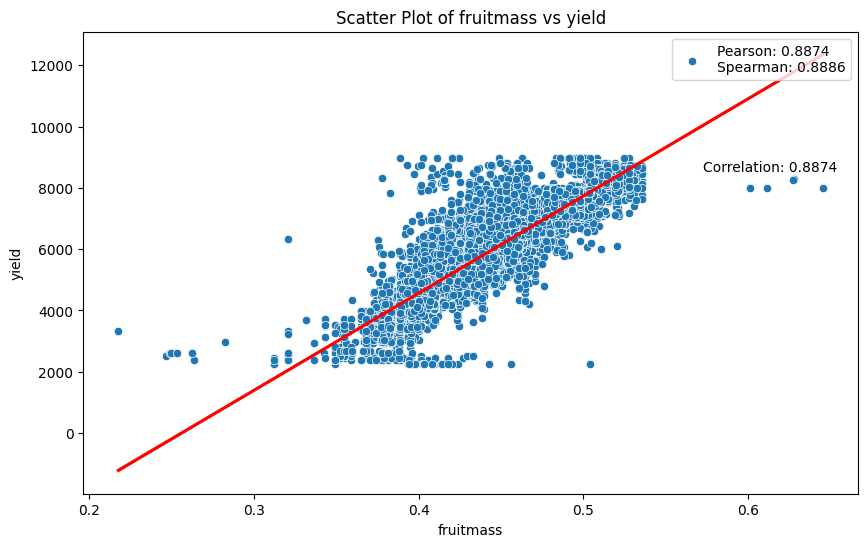

In [98]:
scatter_plot(train_df, 'fruitmass')

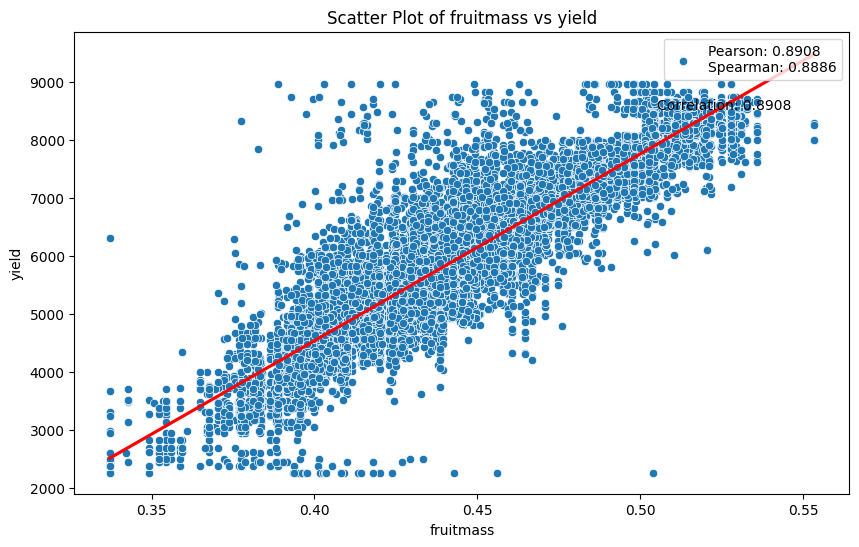

In [99]:
scatter_plot(replace_outliers(train_df, ['fruitmass']), 'fruitmass')

#### seeds

<Axes: ylabel='seeds'>

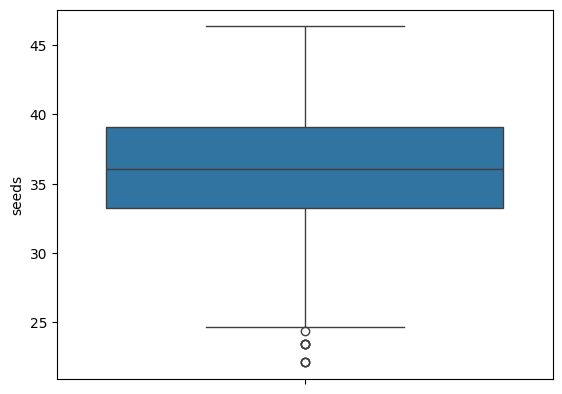

In [100]:
sns.boxplot(data=train_df, y='seeds')

In [101]:
train_df['seeds'].nunique(), test_df['seeds'].nunique()

(1233, 1091)

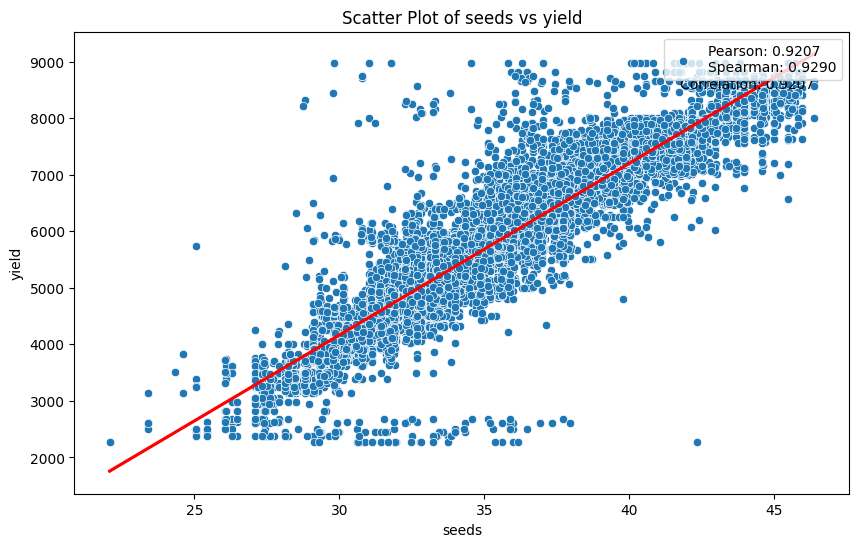

In [102]:
scatter_plot(train_df,'seeds')

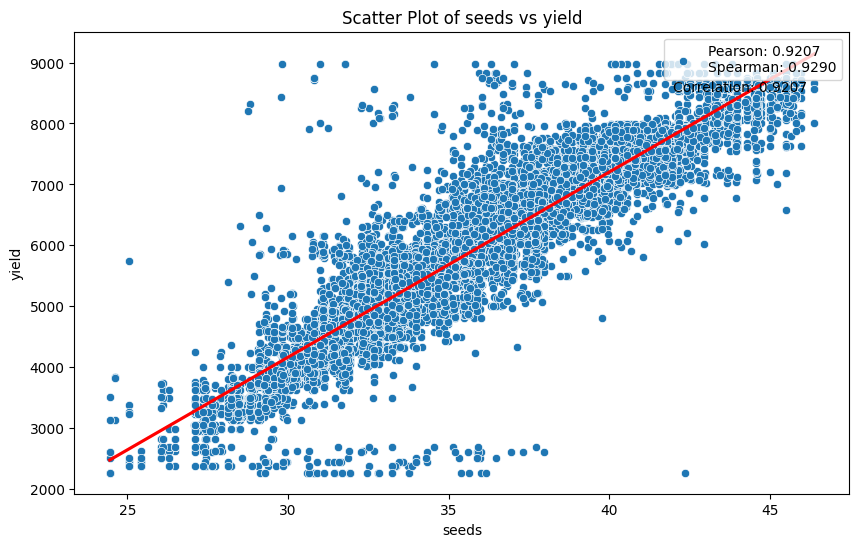

In [103]:
scatter_plot(replace_outliers(train_df, ['seeds']), 'seeds')

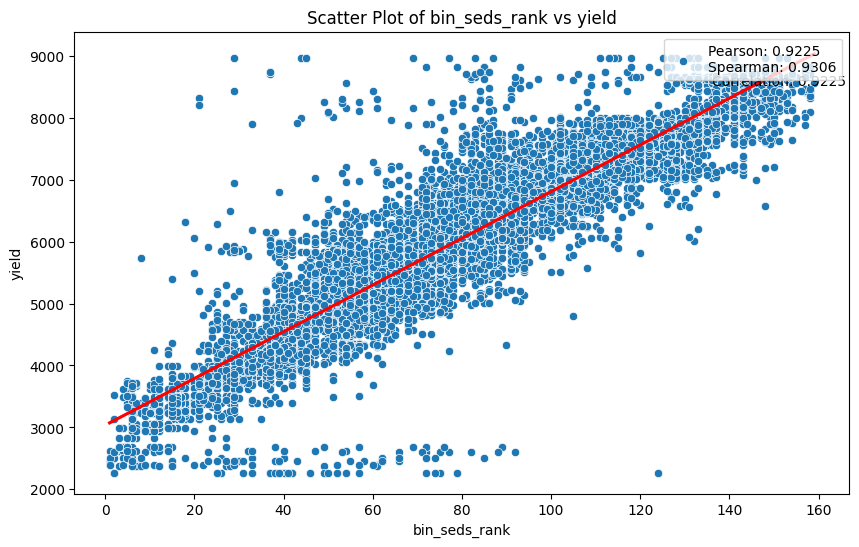

In [104]:
combined_seeds = pd.concat([train_df['seeds'], test_df['seeds']])

bin_edges = pd.cut(combined_seeds, bins=200, retbins=True)[1]
train_df['binned_seeds'] = pd.cut(train_df['seeds'], bins=bin_edges, labels=False, include_lowest=True)
test_df['binned_seeds'] = pd.cut(test_df['seeds'], bins=bin_edges, labels=False, include_lowest=True)

mean_yield = train_df.groupby('binned_seeds')['yield'].mean()
rank = mean_yield.rank()
train_df['bin_seds_rank'] = train_df['binned_seeds'].map(rank)
test_df['bin_seds_rank'] = test_df['binned_seeds'].map(rank)
train_df.drop('binned_seeds', axis=1, inplace=True)
scatter_plot(train_df, 'bin_seds_rank')